# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path= './data/NCDC/europe/uk/marham/dat.txt' 
# file_path, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 4 
# file_path, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 4
# file_path= './data/NCDC/europe/uk/middle_wallop/dat.txt' 
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 4 
# file_path= "./data/NCDC/europe/germany/neuburg/dat.txt"
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # time shift
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path= './data/NCDC/europe/spain/tenerife_sur/dat.txt'  # directions blocked?
# file_path= './data/NCDC/europe/spain/almeria/dat.txt' # negative dimensions?
# file_path= './data/NCDC/europe/greece/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/europe/greece/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path= './data/NCDC/mideast/uae/al_maktoum/dat.txt' 
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" , 0.6
# file_path= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# file_path= "./data/NCDC/cn/hefei_luogang/dat.txt" # few 0, trend, try 2
# file_path= "./data/NCDC/cn/nanjing_lukou/dat.txt" 
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path= "./data/NCDC/oceania/canberra/dat.txt" # high 0, numpy problem

# file_path= './data/NCDC/us/boston_16nm/dat.txt' # Offshore

# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit
# file_path = './data/asos/topeka/hr_avg.csv' # High 0

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19790101  0000  SY-MT  320    6.1         N
1       19790101  0030  FM-15  320    5.1         N
2       19790101  0100  FM-15  320    4.1         N
3       19790101  0130  FM-15  320    4.1         N
4       19790101  0200  FM-15  320    3.0         N
5       19790101  0300  SY-MT  320    2.0         N
6       19790101  0330  FM-15  320    4.1         N
7       19790101  0400  FM-16  320    6.1         N
8       19790101  0500  FM-15  320    2.0         N
9       19790101  0530  FM-15  320    2.0         N
10      19790101  0630  FM-15  320    2.0         N
11      19790101  0700  FM-15  999    0.0         C
12      19790101  0730  FM-15  999    0.0         C
13      19790101  0800  FM-15  320    5.1         N
14      19790101  0830  FM-15  320    5.1         N
15      19790101  0900  SY-MT  320    7.2         N
16      19790101  1030  FM-15  320    9.2         N
17      19790101  1100  FM-15  320    9.2         N
18      19790101  1130  FM-15  320    9.2         N
19      19790101  1200  FM-12  320    9.3         N
20      19790101  1330  FM-15  320    7.2         N
21      19790101  1400  FM-15  320    7.2         N
22      19790101  1430  FM-15  320    7.2         N
23      19790101  1500  SY-MT  320    8.2         N
24      19790101  1530  FM-15  320    8.2         N
25      19790101  1600  FM-15  320    9.2         N
26      19790101  1630  FM-15  320    9.2         N
27      19790101  1700  FM-15  320    2.0         N
28      19790101  1730  FM-15  320    2.0         N
29      19790101  1800  SY-MT  999    0.0         C
...          ...   ...    ...  ...    ...       ...
563818  20170401  0900  FM-15  290    7.7         V
563819  20170401  0930  FM-15  290    7.2         V
563820  20170401  1000  FM-15  300    6.7         V
563821  20170401  1030  FM-15  290    8.2         V
563822  20170401  1100  FM-15  290    7.2         V
563823  20170401  1130  FM-15  290    7.2         V
563824  20170401  1200  FM-15  290    7.2         V
563825  20170401  1230  FM-15  300    7.2         V
563826  20170401  1300  FM-15  300    6.7         V
563827  20170401  1330  FM-15  300    5.7         V
563828  20170401  1400  FM-15  310    6.2         V
563829  20170401  1430  FM-15  300    6.7         V
563830  20170401  1500  FM-15  320    6.2         V
563831  20170401  1530  FM-15  300    6.2         V
563832  20170401  1600  FM-15  300    7.2         N
563833  20170401  1630  FM-15  320    6.2         N
563834  20170401  1700  FM-15  320    6.7         N
563835  20170401  1730  FM-15  300    5.7         V
563836  20170401  1800  FM-15  310    5.7         N
563837  20170401  1830  FM-15  310    5.7         N
563838  20170401  1900  FM-15  300    4.6         N
563839  20170401  1930  FM-15  290    5.1         V
563840  20170401  2000  FM-15  280    3.6         N
563841  20170401  2030  FM-15  290    4.1         V
563842  20170401  2100  FM-15  310    4.1         V
563843  20170401  2130  FM-15  280    4.1         N
563844  20170401  2200  FM-15  310    4.6         N
563845  20170401  2230  FM-15  290    5.7         N
563846  20170401  2300  FM-15  280    5.7         N
563847  20170401  2330  FM-15  280    6.7         N

[563848 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

36.675 -4.499


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


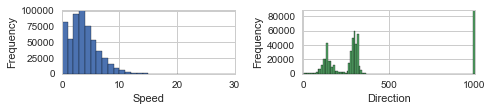

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  5.593740e+05  559374.000000  559374.000000  559374.000000   
mean   1.998095e+07    1162.089545     329.046194       3.545860   
std    1.158641e+05     695.588337     300.786075       2.600544   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.987121e+07     530.000000     150.000000       2.000000   
50%    1.999052e+07    1200.000000     180.000000       3.100000   
75%    2.009011e+07    1800.000000     320.000000       5.100000   
max    2.016123e+07    2354.000000     999.000000      29.800000   

               month   dir_windrose  
count  559374.000000  559374.000000  
mean        6.528253     355.557866  
std         3.448778     289.589550  
min         1.000000       0.000000  
25%         4.000000     160.000000  
50%         7.000000     290.000000  
75%        10.000000     320.000000  
max        12.000000     999.000000

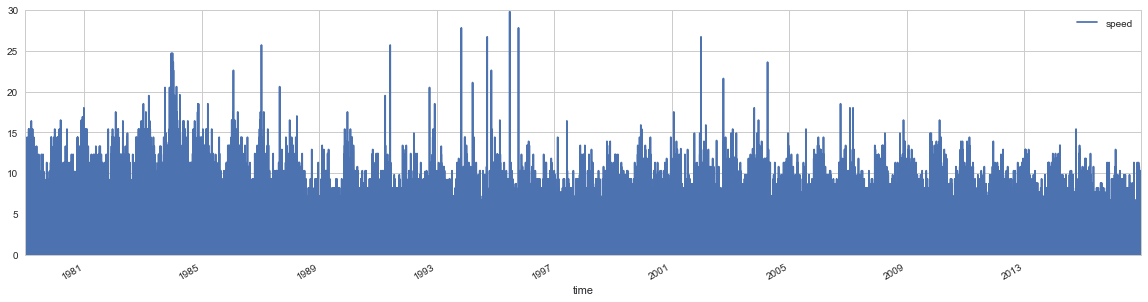

In [9]:
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


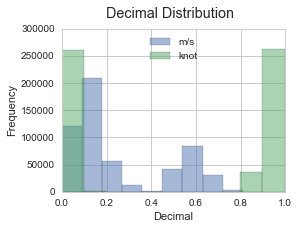

In [10]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [11]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

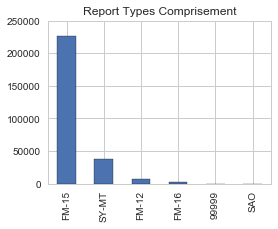

In [12]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

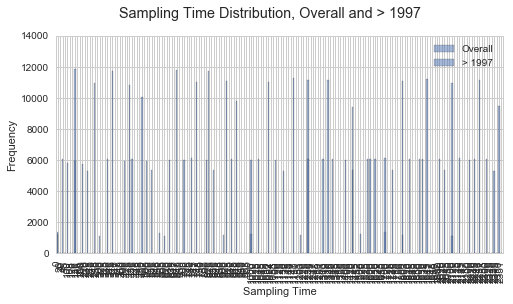

In [13]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[30, 0]


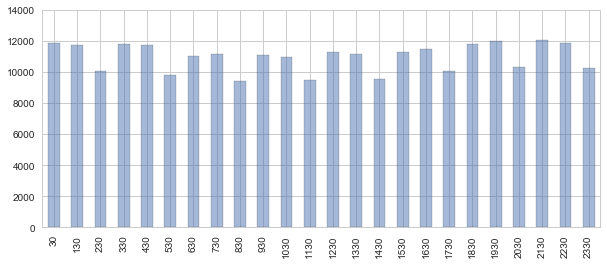

In [14]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [15]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1992-11-04 13:30:00  19921104  1330  FM-15  346      4         N     11   
1994-03-21 13:30:00  19940321  1330  FM-15  252      9         N      3   
1994-08-05 04:30:00  19940805   430  FM-15  127      5         N      8   
1994-12-01 22:30:00  19941201  2230  FM-15  148      5         N     12   
1995-06-24 09:30:00  19950624   930  FM-15  122     15         N      6   
1995-06-25 10:30:00  19950625  1030  FM-15  272      4         N      6   
1995-07-07 06:30:00  19950707   630  FM-15  122      6         N      7   
1995-07-12 19:30:00  19950712  1930  FM-15   32      4         N      7   
1995-07-24 00:30:00  19950724    30  FM-15  302      4         N      7   
1995-09-04 16:30:00  19950904  1630  FM-15  212     13         N      9   
1995-09-05 11:30:00  19950905  1130  FM-15  112     13         N      9   
1995-09-17 03:30:00  19950917   330  FM-15  142     12         N      9   
1995-09-22 07:30:00  19950922   730  FM-15  112      6         N      9   
1995-09-28 22:30:00  19950928  2230  FM-15  132      5         N      9   
1995-10-01 16:30:00  19951001  1630  FM-15  272      5         N     10   
1996-01-19 03:30:00  19960119   330  FM-15  122      8         N      1   
1996-01-24 01:30:00  19960124   130  FM-15  139      6         N      1   
1999-11-10 00:30:00  19991110    30  FM-15  321     14         N     11   
2002-08-26 13:30:00  20020826  1330  FM-15  108     14         N      8   

                     dir_windrose  
time                               
1992-11-04 13:30:00           104  
1994-03-21 13:30:00           198  
1994-08-05 04:30:00           323  
1994-12-01 22:30:00           302  
1995-06-24 09:30:00           328  
1995-06-25 10:30:00           178  
1995-07-07 06:30:00           328  
1995-07-12 19:30:00            58  
1995-07-24 00:30:00           148  
1995-09-04 16:30:00           238  
1995-09-05 11:30:00           338  
1995-09-17 03:30:00           308  
1995-09-22 07:30:00           338  
1995-09-28 22:30:00           318  
1995-10-01 16:30:00           178  
1996-01-19 03:30:00           328  
1996-01-24 01:30:00           311  
1999-11-10 00:30:00           129  
2002-08-26 13:30:00           342

sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-11-04 04:30:00  19931104   430  FM-15  130     54         N     11   
1987-01-14 03:30:00  19870114   330  FM-15  120     48         N      1   
1983-12-20 20:30:00  19831220  2030  FM-15  230     45         N     12   
1984-01-15 04:30:00  19840115   430  FM-15  160     44         N      1   
1984-01-03 19:30:00  19840103  1930  FM-15  130     42         N      1   
1983-10-02 13:30:00  19831002  1330  FM-15  310     40         N     10   
1984-01-15 05:30:00  19840115   530  FM-15  160     40         N      1   
1984-01-12 15:30:00  19840112  1530  FM-15  130     40         N      1   
1983-11-28 09:30:00  19831128   930  FM-15  140     40         N     11   
1984-01-15 03:30:00  19840115   330  FM-15  160     38         N      1   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-11-04 04:30:00           320   48.0           48.0  
1987-01-14 03:30:00           330   18.0           26.0  
1983-12-20 20:30:00           220   23.0           15.0  
1984-01-15 04:30:00           290    6.0            4.0  
1984-01-03 19:30:00           320   10.0            4.0  
1983-10-02 13:30:00           140   32.0           28.0  
1984-01-15 05:30:00           290   -4.0            6.0  
1984-01-12 15:30:00           320    4.0            2.0  
1983-11-28 09:30:00           310   19.0           12.0  
1984-01-15 03:30:00           290   13.0           -6.0

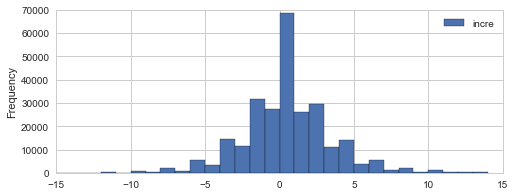

In [16]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [17]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1987-01-14 03:30:00  19870114   330  FM-15  120     48         N      1   
1983-12-20 20:30:00  19831220  2030  FM-15  230     45         N     12   
1984-01-15 04:30:00  19840115   430  FM-15  160     44         N      1   
1984-01-03 19:30:00  19840103  1930  FM-15  130     42         N      1   
1984-01-15 05:30:00  19840115   530  FM-15  160     40         N      1   
1983-11-28 09:30:00  19831128   930  FM-15  140     40         N     11   
1984-01-12 15:30:00  19840112  1530  FM-15  130     40         N      1   
1984-01-15 03:30:00  19840115   330  FM-15  160     38         N      1   
1984-01-12 16:30:00  19840112  1630  FM-15  130     38         N      1   
1984-01-03 20:30:00  19840103  2030  FM-15  130     38         N      1   

                     dir_windrose  incre  incre_reverse  
time                                                     
1987-01-14 03:30:00           330   18.0           26.0  
1983-12-20 20:30:00           220   23.0           15.0  
1984-01-15 04:30:00           290    6.0            4.0  
1984-01-03 19:30:00           320   10.0            4.0  
1984-01-15 05:30:00           290   -4.0            6.0  
1983-11-28 09:30:00           310   19.0           12.0  
1984-01-12 15:30:00           320    4.0            2.0  
1984-01-15 03:30:00           290   13.0           -6.0  
1984-01-12 16:30:00           320   -2.0            6.0  
1984-01-03 20:30:00           320   -4.0            8.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       2707
10       958
20       690
30       623
40       549
50       362
60       357
70       313
80       245
90       584
100      846
110     2496
120     5324
130    26335
140    19495
150    27649
160    23614
170    14738
180     7144
190     1626
200      788
210      880
220      887
230     1068
240     1166
250     1786
260     2183
270     5760
280     4440
290     8392
300     8653
310    19409
320     9822
330     9437
340     5534
350     3401
999    42936
Name: dir, dtype: int64

36 10.0


In [19]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [20]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0552211768831


0     32771
2      4783
1      3854
3      1160
4       161
5        90
6        67
7        21
8        15
9         6
10        5
15        1
14        1
13        1
Name: speed, dtype: int64


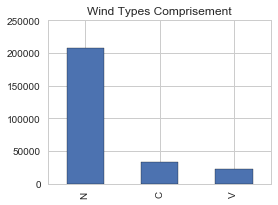

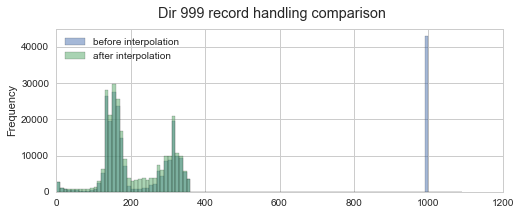

In [21]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

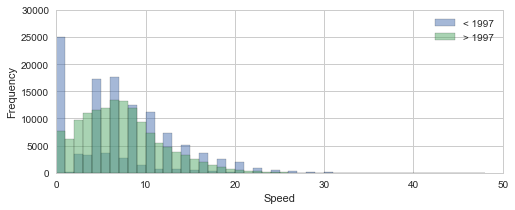

In [22]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

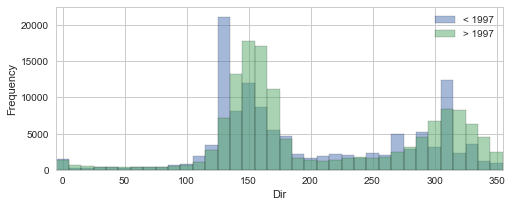

In [23]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


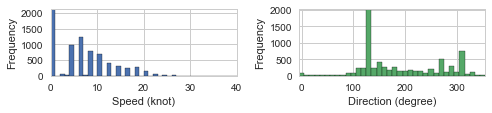

1980 - 1984


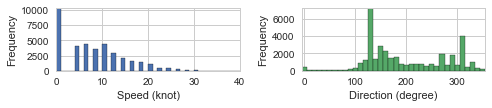

1985 - 1989


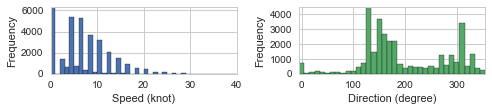

1990 - 1994


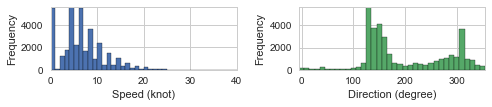

1995 - 1999


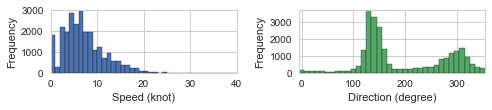

2000 - 2004


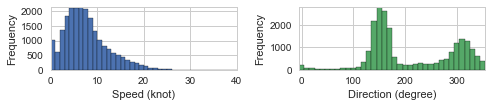

2005 - 2009


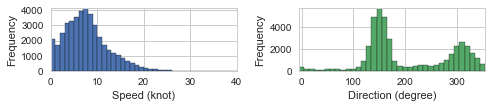

2010 - 2014


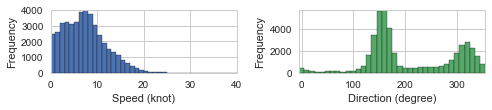

2015 - 2016


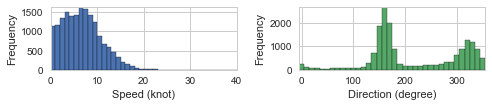

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 16.0)

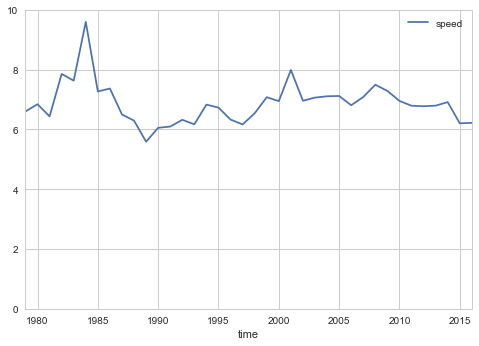

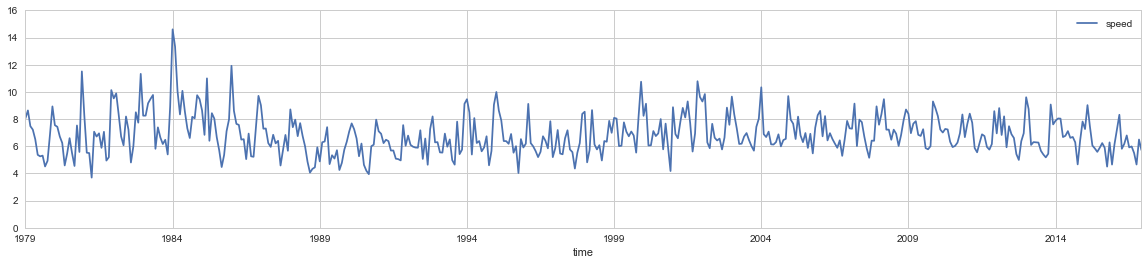

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEWpJREFUeJzt3XlsVNXbwPHvtGM7040Wirwotra4i4qIFqOigmsiVQQE
JPALVCIiLkEIi6IslS3gRojBBBJSNNFUYkAjCNG8Kq5g60tZFBEYOkDfztrOQmfaOe8fpfPOlG5T
emem7fNJSKb3cGaeO9On99wz5z5Xp5RSCCG6VEKsAxCiJ5LEEkIDklhCaEASSwgNSGIJoQFJLCE0
IIkVp5RSPPfcc2zbti24zeFwMG/ePAoKCrj33nv54IMPCAQCwXaXy8XixYsZMWIEI0aMYMGCBdjt
9mC73+9n+fLlFBQUUFBQwNq1a2loaIjqfvUWklhxqKGhgaVLl/LDDz+EbX/ppZc4evQoH374IRs3
bmTPnj2sW7cu2L5s2TKOHTvGli1b2Lx5M8eOHeONN94Itr/zzjv8+OOPbNq0iXfffZcdO3awadOm
qO1Xr6JEXDGZTGrSpEnqwQcfVMOHD1clJSVKKaUqKirUddddpw4dOhT8v2VlZermm29WbrdbKaXU
sGHD1M6dO4PtO3bsUEOHDlVKKXX+/Hl12223qb179wbbt2/fru6++27V0NAQjV3rVeSIFWfKysrI
z89n+/btpKenB7ebTCYMBgM33XRTcNsNN9yA3++noqICgKysLHbu3EltbS0ul4svv/ySIUOGAHDk
yBG8Xi933XVXsP/w4cOxWq2YTKYo7V3voY91ACJcYWEhhYWFF23v378/58+fx2az0bdvXwDMZjMA
NpsNgBUrVjB//nzuvPNOAK666io++eQTAKqqqjAajWHJ2r9/fwDOnTvH1Vdfrdk+9UZyxOombr31
VnJzc3nrrbdwOp3Y7XZWr16NXq/H7/cD8O+//5KXl8fWrVvZunUr6enpzJ8/H6UUXq+X5OTksOdM
SkoCwOfzRX1/ejo5YnUTSUlJbNiwgblz51JQUIDRaGTOnDkcOnSItLQ0TCYTxcXF7Nq1i9zcXAA2
bNjA6NGj+e233zAYDBclUNPPRqMx6vvT07WbWIFAgKVLl/LXX3+RlJREcXFx8INr4vV6mT59Om+/
/TaDBw8GYOzYsaSlpQEwaNAgVq1apUH4vcv111/PV199hdVqJS0tjYaGBtauXctVV11FRUUFBoMh
7LO58sorycrK4vTp01xzzTV4PB5cLlfwc6murgZgwIABMdmfnqzdoeDevXvx+Xx8+umnvPbaa6xe
vTqs/eDBg0yZMoXTp08Ht9XV1aGUoqSkhJKSEkmqLuB0Onn22Wcxm83069eP5ORkvvvuO/r378/g
wYMZMGAAHo+HysrKYB+LxYLD4SAnJ4cbbrgBo9HIgQMHgu379+8nOzubnJycWOxSj9ZuYh04cID7
7rsPgKFDhwZnoJr4fD42btxIfn5+cNvRo0fxer3MmDGDadOmUV5e3sVh9z59+vShrq6OVatWcfLk
SX744QeWL1/OnDlz0Ol0DB06lCFDhjB//nwqKio4fPgwc+fOZciQIQwfPhyDwcD48eNZvnw5Bw4c
4Oeff2b9+vVMmzYt1rvWI7U7FAwdOgAkJiZSX1+PXt/Y9Y477rioj8FgoKioiAkTJnDy5ElmzpzJ
rl27gn1aEvqXVDSqq6vDZDIF35vnnnuOzZs3U1hYSEZGBk899RTXXnttsP3FF19k27ZtTJ8+HYBb
brmF2bNnU1ZWBsDo0aOprKykqKiIyy67jJEjRzJs2DB57zugpd/ztrSbWGlpabjd7uDPgUCgzQQB
yMvLIzc3F51OR15eHpmZmVRXVzNw4MA2+x1PPkuto4anbnyUfv36dXAXLma1WvniyG7SMzMier4D
Bw5E/AZqoSmOffv2XdT2+OOPt9l31KhRbbbffffdEcUQa/EQR2f+8LQ7FBw2bBjff/89AOXl5Vx3
3XXtPmlpaWnwXKyqqgqXyxX8zkSI3qDdI9bDDz/Mvn37mDRpEkopVq5cyc6dO/F4PEycOLHFPuPH
j2fRokVMnjwZnU7HypUr2z3KCdGTtPvbnpCQwPLly8O2NU2phyopKQk+TkpKYv369V0QnhDdk6y8
EEIDklhCaEASSwgNSGIJoQFJLCE0IIklhAYksYTQgCSWEBqIq8Ty+3z4fX6U3ABFdHNxtc7oTLWb
GpsTj8cT61CEuCRxdcTSX3YZibKmUPQA3fa3OBAIhFV5hcbyXwkJCSil8Pv8MrQUMdNtE8tut/Px
r5+TmtF4Eaa7xsWUgnH069cPj8eDucpJhj9BhpYiJrptYgGkZqSRnpnRYluiXi9DSxEzcXWOJURP
IYklhAa67TgpdIICkEkKEVe6bWKFTlAAMkkh4kq3TSz4/wmKpsdCxIt2z7ECgQBvvvkmEydOZOrU
qZw6deqi/+P1epk0aRLHjx/vcB8hejJNSky310eInk6TEtPt9RGip9OkxHR7fVpjs9modTo4ePBg
8E4YrTl37hwOp4MGXePPof1C2zr6fE3ipdxyPMQRDzFA/MQRCU1KTHemD0Dfvn1JVI01x9u7A4bJ
ZOJ3zyn6XLi7YWi/0LaOPh/ERznjeIkjHmKIlzjipsR0Z/pESyAQwGq1Bv8FAoHgdofD0WKbEJHS
pMR0S33ihc1mY+u+T0lNT8Nd6+I/90wkOzsbu93Od6afOZlcBYQv6hUiUpqUmG6pT7zweDw4PA0E
DAnUeBrCvlROSU9pdVGvEJHolWsFZeW70FqvTCwhtCaJJYQGJLGE0IAklhAakMQSQgOSWEJoQBJL
CA1IYgmhAUksITQgiSWEBmRNzwVKKfz19VL1SXQJSawLPB4PFsd5UqobryOTqk/iUkhihZCqT6Kr
yDmWEBqQP8sd0PyWQU23CxKiNT0msRSN50lutxuPx4NqYTsXHkc6JRF6yyC5slh0RI9JrIb6evYf
NlNVm4Tp1GkCDQ0XbQfC2iLR1i2DhGiuxyQWQHKyEWNKCsnJRqi/eHvT49A2IbTQrRJLKRWcAu/M
kE6IaGk3sQKBAEuXLuWvv/4iKSmJ4uJicnNzg+3ffvstGzduRK/XM27cOJ555hkAxo4dGyzaOWjQ
IFatWnXJwXo8Hn784wQGQ0qnh3RCREO7iRVah728vJzVq1fz4YcfAuD3+1m1ahWlpaUYjUYmT57M
qFGjSE9PRykVVrmps0KPUm63u9XhnhDxpN3EaqsO+/Hjx8nJyaFPnz5AY7np33//nSuuuAKv18uM
GTOor69n7ty5DB06tFMBhh6lHHYLhpQ0UlJTO/VcQkTLJdVud7lcpKenB9tSU1NxuVwYDAaKioqY
MGECJ0+eZObMmezatatTtdu9Xi/mM14MBiNOh42EhESsVhvmypM49Q7QJwLgdDow2U/hrw+EtYVu
B8Lamtd7b4oBwmu+OxwOquzncHlcuGtclNeVk5mZGcn7HLF4qFceDzFA/MQRiUuq3d68ze12k56e
Tl5eHrm5ueh0OvLy8sjMzKS6upqBAwe2+Vot1W53u900JFdhTEnBZrWgS0ggK6sv+gSocdvpe6F2
u/LXk5ORS+7V+WFtoduBsLbm9d73nP0z+HyhbRaLhWP/U0l6ZjrJ+mRuu/U2srOzg+9HV395HC/1
ymMdQ7zEEfXa7YMHD+bUqVM4HA58Ph/79+/n9ttvp7S0NHhPrKqqKlwuF/379484uHjRdFvWM9Vu
zFXhi3Obvjz+4shuPv7187AkE73XJdduX7hwIUVFRSilGDduHAMGDGD8+PEsWrSIyZMno9PpWLly
ZYfuNhJtzVdrtKWt6rny5bFo7pJrt48aNYpRo0aFtSclJbF+/fouClE7ra3W6ArNh4ggawx7k/g7
jERZ2PR9Fwp

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE8NJREFUeJztnXlsVNe9xz/2jO0ZjxfMEvpeig12Swk41BAXEykFhZa4
akL6VEiwiRypSSuiKk0RrWWShqXYKiRqE6kIIVolEoJEBSW8KKQvoWGRSNgSCA6xgUAI2NhgjGfz
rJ7tvD8GX2bGYw9ge+4d+3wkS3PvmXP9uzPzvWf7nd8vTQghkEgkSSVdbQMkktGIFJ5EogJSeBKJ
CkjhSSQqIIUnkaiAFJ5EogJSeCmGEIJf//rX7NixQzlns9n44x//SEVFBQ899BB///vfCYVCSrnT
6eSll15i7ty5zJ07l7q6OqxWq1Lu9/tZv349FRUVVFRU8OqrrxIMBpN6X6MNKbwUIhgMsm7dOj75
5JOo87/73e84d+4cW7ZsYfPmzXz88cf89a9/Vcr//Oc/c+HCBd58803eeOMNLly4wMsvv6yUv/ba
a3z66ads3bqV119/nffff5+tW7cm7b5GJUKSErS2toqqqirx8MMPi/LycrF9+3YhhBBNTU1i6tSp
orm5WXnvqVOnxIwZM4TL5RJCCDF79myxZ88epfz9998XZWVlQgghvF6v+OEPfyj27dunlO/evVs8
+OCDIhgMJuPWRiWyxUsRTp06RXFxMbt37yY3N1c539raisFgYPr06cq5adOm4ff7aWpqAqCgoIA9
e/bgcDhwOp188MEHlJaWAnD27Fk8Hg9z5sxR6peXl2M2m2ltbU3S3Y0+9GobILk9Hn/8cR5//PE+
5ydMmIDX68VisTB27FgA2tvbAbBYLADU19dTW1vLj370IwAmTZrE22+/DcD169cxGo1RYp4wYQIA
HR0dTJ48edjuaTQjW7wUZ+bMmRQVFbF27VrsdjtWq5WNGzei1+vx+/0AfPvtt0yZMoVt27axbds2
cnNzqa2tRQiBx+MhKysr6pqZmZkA+Hy+pN/PaEG2eClOZmYmmzZtYuXKlVRUVGA0Gnn++edpbm4m
JyeH1tZWGhoa+OijjygqKgJg06ZN/OQnP+Gzzz7DYDD0EVjvsdFoTPr9jBak8EYAP/jBD/j3v/+N
2WwmJyeHYDDIq6++yqRJk2hqasJgMCiiA7j33nspKCjgypUrfO9738PtduN0OsnJyQHgxo0bAEyc
OFGV+xkNyK5mimO321m2bBnt7e2MGzeOrKwsDh48yIQJEygpKWHixIm43W7a2tqUOl1dXdhsNgoL
C5k2bRpGo5GTJ08q5SdOnGD8+PEUFhaqcUujAim8FCc/P5+enh42bNjA5cuX+eSTT1i/fj3PP/88
aWlplJWVUVpaSm1tLU1NTZw5c4aVK1dSWlpKeXk5BoOBJUuWsH79ek6ePMnRo0f529/+xtNPP632
rY1o0oTQ7kbYyKew5BYvvPACjz76KJWVlQB0dnbyxhtvcP78efLy8nj00Ud55JFHlPfb7XZ27NjB
V199BcD9999PTU0NeXl5QHhMt23bNo4dO0ZGRgbz5s2jqqqK9HT5XE7EAw88cFf1NC+8u72xZHKn
dprNZt47u5fcMeEfvsPWzf/cV8m4ceOGy0Rg5H6eajEYO+UjTSJRASk8iUQFpPAkEhWQwpNIVEAK
TyJRASk8iUQFpPAkEhWQwpNIVEAKTyJRAbk7QaJpQqFQVGAmCO+oT3V3Nik8iaaxWq28dfxdTHnh
LUuubidPVSwedve64UYKT4MIIXC73VHnsrOzSUtLU8kidTHl5Sh+rSMFKTwN4na7+fSLSxgM2QB4
vW4emj0Fk8mksmWSoUIKT6MYDNkYs7PVNkMyTKT2CFUiSVFki6cCQgj8Pj/+m0GF/D4/Gt4WKRkG
pPBUwO12037dTp4/3OHottj7TKZIRjYJu5qhUIg1a9awdOlSampqaGlpiSo/cOAAixcvZunSpeza
tSuq7Msvv6SmpkY5bmlpobq6mmXLlrF27dqoxBqjDZ1ejz4jA31GBjq9fP6NNhIKb9++ffh8Pnbu
3Mkf/vAHNm7cqJT5/X42bNjAm2++yfbt29m5cyddXV0A/POf/+Tll1+mp6dHef+GDRtYsWIFb7/9
NkII9u/fPwy3JJFon4TCO3nyJD/+8Y8BKCsrU+LxA1y8eJHCwkLy8/PJzMzkgQce4PPPPwegsLCQ
TZs2RV2rublZidE/b948jhw5MmQ3IpGkEgn7OJGBTgF0Oh2BQAC9Xo/T6YyKuW8ymXA6nQBUVlZG
xXKE8KRC7yKwyWTC4XAkNDBVIo3diZ0dHR3Y7DaCN9fDHXYbX331lRJI1uPxcLHdg8FgvHnsxme7
2Ceys8FguONF9VT7PG02G9etHTjd4d+Vq9tJY08jY8aMUdO8QZNQeDk5ObhcLuU4FAqhvzkmiS1z
uVxRQowl0r/O5XIp4eUGYiRGm2ptbeVzdwv5N5OM6EQ45F5vAFmXy0Uw67qyjmcxd+Hx9ZCZVaBc
w+t1M+u+O1tUT8XoXWazmctnr9+KyJbdTdl9ZZpwGRvMQyxhV3P27NkcOnQIgMbGRqZOnaqUlZSU
0NLSgs1mw+fzceLECWbNmtXvtaZPn87x48cBOHToEOXl5Xdt+Ggjy2DEmJ2t/PV6tUhSk4Qt3sKF
Czl8+DBVVVUIIfjLX/7Cnj17cLvdLF26lFWrVvHss88ihGDx4sUDxtuvq6tj9erVvPbaaxQXFysB
WSWS0UZC4aWnp7N+/fqocyUlJcrrBQsWsGDBgrh1v/vd70YtMUyZMiUqd7dEMlqRLmMSiQpI4Ukk
KiCFJ5GogBSeRKICUngSiQpI71wNIAjvWOh1RnC5XHKb0AhHCk8DBAMBTpxp57ojEwCbtQtDdg7Z
MtTDiN27KIWnEbKyjIqLmMcjvVJ6Gal7F6XwJJqnd+9i7+uRgJxckUhUYGQ8PkYYoVAIl6Ob9Js7
frrtNnLzU3sbjCQaKTwN4nR089n1TxnjC299sXZ1MTd9PuPGjVfZMslQIYWnUYw5Jkz54b2NXq9H
ZWskQ40c40kkKiCFJ5GogBSeRKICcoyXogghouLdwOjOKJRqSOGlKF6vh2OnbeTnF9w8lhmFUgkp
vBSmNwCSJPWQYzyJRAVkiycZNuLlL4eRkcN8sEjhSYaN2PzlMHJymA+WhMILhUKsW7eOr7/+mszM
TBoaGigqKlLKDxw4wObNm9Hr9SxevJgnn3yy3zpnzpxh+fLlTJ48GYDq6mp+/vOfD9vNSdRnJOYv
HwoSCi8yW1BjYyMbN25ky5YtwK1sQe+88w5Go5Hq6moWLFjAF198EbdOc3Mzv/rVr3jmmWeG/cYk
Ei2TUHi3my0IULIFNTY2xq3T1NTEpUuX2L9/P0VFRbz00ktRCVEko49448DRkDdxWLIF9Vdn5syZ
PPHEE5SWlrJlyxY2b95MXV3dgP8/1bLb3A6x2YLsdhut1hb8gfAPrr3tMna9DfS6uOUAdpuF9HQd
ZrMFCK/r6Xqu9skoNBg7B0tsph/om+3HZrNxsPUo2bnhZRG3w83DhQ8qdibKrJSqDEu2oP7qLFy4
UMkQtHDhQurr6xMamGrZbW6H2GxBwh+gMK+IosnFAOjTodtlZWw/5RDOIJSWnk5BQfg9HrebWdMn
DriAnuxsQbGZfqBvth+z2czlrIhsQLZu6Ln1vSfKrKQmmssW1F+dZ599ltOnTwNw9OhRZsyYcdeG
SySpzLBkC4pXB2DdunXU19eTkZHB+PHjb6vFk0hGIsOSLSheHYAZM2bwr3/9625tHbWIUAhHtx27
zaKck+EgUhu5gJ4CeFweGv2fcdVwK7X1aA0HERv8t5dU25khhZciGHKylVAQMHLCQcQGrPX5/Hg8
HkVYbrebyPC

In [28]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFOdJREFUeJzt3W1QVHXfB/DvYQFFFp8ux8a5fALSMWTIdEdrUKuZFMfR
1EacwMEZUQNSlBqIB8GFWVIZlUpz6QnfQLgx2nQ1OU0pkzEG8oI7YIDMiZsoH25NLGVVdhX+9wvH
vdp48r/ssrtnv59XcTjm+U3Nd8+e8z/nqwghBIiI6LH5ufsAiIi8DYOTiEgSg5OISBKDk4hIEoOT
iEgSg5OISJL/UDv09PQgNzcX7e3tUBQFBQUFePDgAZKSkjBz5kwAQFxcHFauXInKykqYTCb4+/sj
JSUFL774Irq7u5GRkYHOzk4EBwejqKgIEydORENDA95++21oNBosXrwYO3bscPWsRETOIYZw+vRp
kZWVJYQQ4vz58yI5OVlUVlaK0tJSu/2uX78uVq1aJSwWi7h9+7btn48dOyYOHz4shBDiq6++EgaD
QQghxMsvvyw6OjpEb2+v2Lp1q2hpaRnqUIiIPMKQX9VfeuklGAwGAMCVK1cwduxYNDc34+zZs9i4
cSNycnJgNpvR1NSEZ555BoGBgQgJCcH06dNx4cIF1NfXY8mSJQCApUuXora2FmazGVarFdOnT4ei
KFi8eDFqampc+wlBROQkQ35VBwB/f39kZmbi9OnTOHz4MK5du4bY2FhERkaipKQER48exZw5cxAS
EmL7M8HBwTCbzTCbzbbtwcHB6Orqgtlshlartdv3999/H/QY6uvrHZmPiGhICxYskNr/sYITAIqK
ipCeno4NGzbAZDLhiSeeAAAsW7YMBoMBOp0Od+7cse1/584dhISEQKvV2rbfuXMHY8eOtdv29+1D
kR3Om9TX13M+L8b5vJcjJ2VDflX/4osv8OGHHwIAgoKCoCgKduzYgaamJgBAbW0t5s6di6ioKNTX
18NisaCrqwttbW2YPXs25s+fj++//x4AUF1djQULFkCr1SIgIAC//fYbhBA4d+4cdDqd9METEbnD
kGecy5cvR3Z2NjZu3IgHDx4gJycHU6ZMgcFgQEBAACZNmgSDwQCtVouEhATEx8dDCIE33ngDo0aN
QlxcHDIzMxEXF4eAgAAcOnQIAFBQUID09HT09PRg8eLFePrpp10+LBGRMyhCeMfbkdT8VQHgfN6O
83kvR2bjAngiIkkMTiIiSQxOIiJJDE4iIkmPvY7TE1y8eLHPtvDwcGg0GjccDRH5Kq8KzqT9Z+x+
vnvrOsr2xWP27NluOiIi8kVeFZzaCf929yEQEfEaJxGRLAYnEZEkBicRkSQGJxGRJAYnEZEkr7qr
7m49PT1oa2vrs51rSYl8C4NTQltbGxKyKzBm3GTbNq4lJfI9DE5JY8ZN5npSIh/nUD3wqFGjkJWV
BUVRMGvWLOj1evj5+bEemIh8wpA3h7777jsAgMlkQlpaGt555x3s27cPaWlpqKiogBACVVVV+OOP
P1BWVgaTyYTS0lIUFxfDarXi+PHjmD17NioqKrB27VoYjUYAgF6vx6FDh3D8+HE0NjaitbXVtZMS
ETmJQ/XALS0tWLhwIYCHlb81NTWsByYin+FQPfAPP/wARVEA2Ff+urIeeCDNzc3o6upy6M/K6ujo
cOkxqL0CmfN5N7XPJ8OhemCLxWLbPljlr7PrgfsTGRk5Yne0Q0JCgK/+zyXHoOZOF4DzeTs1zzdi
9cCRkZGoq6sD8LDyV6fTsR6YiHyGQ/XA4eHhyMvLQ3FxMcLCwhATEwONRsN6YCLyCUMG55gxY/De
e+/12V5eXt5n24YNG7Bhwwa7bUFBQTh8+HCffefNm4fKykqZYyUi8gg+vwCej1ESkSyfD04+RklE
snw+OAE+RklEcvhaOSIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkM
TiIiSQxOIiJJDE4iIkkMTiIiSYO+Hen+/fvIycnB5cuXYbVakZKSgilTpiApKQkzZ84EAMTFxWHl
ypXsVCcinzFocH755ZcYP348Dhw4gL/++gtr167F9u3bsXnzZiQmJtr2e9SpfvLkSVgsFsTHxyM6
OtrWqZ6amopTp07BaDQiNzcXer0eR44cwbRp0/Daa6+htbUVERERLh+WiMgZBg3OFStWICYmBgAg
hIBGo0FzczPa29tRVVWFGTNmICcnx65TPTAw0K5TfevWrQAedqobjUa7TnUAtk51R4NzuNW8MpW/
rAceHs7n3dQ+n4xBgzM4OBgAYDabsXPnTqSlpcFqtSI2NhaRkZEoKSnB0aNHMWfOHLd0qgPDr+aV
qfxlPbDjOJ93U/N8jnwgDPkG+KtXr2L79u2Ij4/H6tWrcfv2bVsH+rJly2AwGKDT6dzSqe7JBuoy
AthnROTtBg3OGzduIDExEXv27MFzzz0HANiyZQvy8vIQFRWF2tpazJ07F1FRUXj33XdhsVhgtVr7
dKpHRUX126k+bdo0nDt3TpU3h/rrMgLYZ0SkBoMG5wcffIDbt2/DaDTCaDQCALKysrB3714EBARg
0qRJMBgM0Gq17FTvB7uMiNRp0ODMzc1Fbm5un+0mk6nPNnaqE5Gv4AJ4IiJJDE4iIkkMTiIiSQxO
IiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIi
SdL1wE8++SSysrKgKApmzZoFvV4PPz8/1gMTkc8Y9IzzUT1wRUUFPvnkExgMBuzbtw9paWmoqKiA
EAJVVVW2emCTyYTS0lIUFxfDarXa6oErKiqwdu1a21vk9Xo9Dh06hOPHj6OxsRGtra0jMiwRkTMM
GpwrVqzArl27APy3HrilpQULFy4E8LDyt6amxq4eOCQkxK4eeMmSJbZ9a2tr7eqBFUWx1QMTEXkL
6XrgoqIiKIpi+/2jyl931QN7aq/6QPsOtD+g/t5qzufd1D6fDOl64AMHDth+N1jl70jVA3tqr/pA
+w60v5p7qwHO5+3UPJ8jHwiDflV/VA+ckZGB9evXAwAiIiJQV1cHAKiuroZOp0NUVBTq6+thsVjQ
1dXVpx740b7/rAcWQuDcuXPQ6XTSB05E5C7S9cC7d+9GYWEhiouLERYWhpiYGGg0GtYDE5HPcKge
uLy8vM821gMTka/gAngiIklD3hwi1+vp6UFHR4fdyoRHwsPDodFo3HBURDQQBqcHaGtrQ9GnTRgz
zv4u/N1b11G2L35YqwaIyPkYnB5izLjJ0E74t7sPg4geA69xEhFJYnASEUlicBIRSWJwEhFJYnAS
EUlicBIRSWJwEhFJYnASEUlicBIRSeKTQ8MkenvR3t7eZ3t/24hIHRic/ZAJw3tdf2DPRzcwZlyb
3fbOSz/hX1OfctkxEpH7PFZwNjY24uDBgygrK0NrayuSkpIwc+ZMAEBcXBxWrlypqnpg2TDs7znz
u7euufQYich9hgzOjz/+GF9++SWCgoIAAC0tLdi8eTMSExNt+zyqBz558iQsFgvi4+MRHR1tqwdO
TU3FqVOnYDQakZubC71ejyNHjmDatGl47bXX0NraioiICNdN6QCGIRENZMibQ9OnT8eRI0dsPzc3
N+Ps2bPYuHEjcnJyYDabWQ9MRD5lyDPOmJgYXLp0yfZzVFQUYmNjERkZiZKSEhw9ehRz5sxRXT2w
K/3zmB2pEvZGaq+X5Xy+Q/rm0LJly2x1vsuWLYPBYIBOp1NdPbAr/fOYZauEvZGa62UBzufNnF4P
3J8tW7agqakJAFBbW4u5c+eyHpiIfIr0GWd+fj4MBgMCAgIwadIkGAwGaLVaj68H7unpQVtbW5/t
XG9JRLIeKzi

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAG4lJREFUeJzt3XtsVHX+//Hn9GqZmYqsMTFfHAWk0dKU3sL+QanLL2qN
EW+BiVNTEgsIXUFht9hSi7Up6jZuSbZovS3+U4Q6kY0xuhsvRGmwwB/z3dK0tUu26RYQL1B3Zc4I
U2jP7w9jv3Zbpu1hpjMtr0dCUj7nMzPvz+fAq+fMudlM0zQREZFJi4t2ASIi05UCVETEIgWoiIhF
ClAREYsUoCIiFilARUQsShivw+DgIFVVVfT29mKz2aipqSE5OZmKigpsNhsLFy6kurqauLg4vF4v
zc3NJCQkUFpayvLly7lw4QJbt26lv78fu91OXV0dc+bMoa2tjeeff574+Hjy8/PZuHHjVIxXRCR8
zHF88sknZkVFhWmapnnkyBFzw4YN5vr1680jR46Ypmma27dvNz/++GPzu+++M++77z4zGAya586d
G/75rbfeMhsaGkzTNM0PPvjArK2tNU3TNO+//36zr6/PHBoaMteuXWt2dnaOV4qISEwZdxf+zjvv
pLa2FoDTp0+TmppKZ2cnS5YsAaCgoIDW1lba29vJzs4mKSkJp9OJy+Wiu7sbn8/HsmXLhvsePnwY
wzAYGBjA5XJhs9nIz8+ntbU1gr8mRETCb9xdeICEhATKy8v55JNPaGho4IsvvsBmswFgt9vx+/0Y
hoHT6Rx+jd1uxzCMEe2/7OtwOEb0PXnyZMgafD7fpAcnIjIRubm5ll43oQAFqKuro6ysDLfbTTAY
HG4PBAKkpqbicDgIBAIj2p1O54j2UH1TU1PHrcHqIMPN5/Oplv9y/PhxirftZda1N4xa9uMP39H0
YhFpaWlTVk+szAuolliuA65s42zcXfj33nuP119/HYCUlBRsNhsZGRkcPXoUgJaWFvLy8sjMzMTn
8xEMBvH7/fT09JCWlkZOTg4HDx4c7pubm4vD4SAxMZETJ05gmiaHDh0iLy/P8iAkNsy69gYc1/3P
qD9jharITDDuFujdd9/Ntm3bePTRR7l06RKVlZUsWLCA7du3s3PnTubPn09hYSHx8fEUFxdTVFSE
aZps2bKF5ORkPB4P5eXleDweEhMTqa+vB6CmpoaysjIGBwfJz89n8eLFER+siEg4jRugs2bN4k9/
+tOo9j179oxqc7vduN3uEW0pKSk0NDSM6puVlYXX651MrSIiMUUn0ouIWKQAFRGxSAEqImLRhE9j
kqvD4OAgPT09l12+YMEC4uPjp7AikdilAJURenp6Yup8TpFYpgCVUX4+n1NEQtN3oCIiFilARUQs
UoCKiFikABURsUgBKiJikQJURMQiBaiIiEUKUBERixSgIiIWKUBFRCxSgIqIWKRr4SXizKEhent7
L7tcd3iS6UoBKhF33n+GZ984y6xrR98mT3d4kuksZIBevHiRyspKvvrqKwYGBigtLeXGG29k/fr1
3HLLLQB4PB7uvfdevF4vzc3NJCQkUFpayvLly7lw4QJbt26lv78fu91OXV0dc+bMoa2tjeeff574
+Hjy8/PZuHHjVIxVokh3eJKZKGSAvv/++8yePZuXXnqJ//znPzz44IM88cQTPPbYY5SUlAz3O3Pm
DE1NTezfv59gMEhRURFLly5l3759pKWlsWnTJj788EMaGxupqqqiurqaXbt2cdNNN/H444/T1dVF
enp6xAcrIhJOIQ8i3XPPPTz11FMAmKZJfHw8HR0dfP755zz66KNUVlZiGAbt7e1kZ2eTlJSE0+nE
5XLR3d2Nz+dj2bJlABQUFHD48GEMw2BgYACXy4XNZiM/P5/W1tbIj1REJMxCboHa7XYADMPgySef
ZPPmzQwMDLBq1SoyMjJ49dVXeeWVV7jttttwOp0jXmcYBoZhDLfb7Xb8fj+GYeBwOEb0PXny5ISK
9fl8kx5gpMzUWvr6+kIu7+jowO/3T/p1Vt7zSs3UdXSlYqWWWKnjSox7EOnrr7/miSeeoKioiBUr
VnDu3DlSU1MBuOuuu6itrSUvL49AIDD8mkAggNPpxOFwDLcHAgFSU1NHtP2yfSJyc3MnNbhI8fl8
M7YWp9MJH3xz2eUZGRljHvAZ73WhXO49r8RMXkdXIlZqiZU64MqCPOQu/NmzZykpKWHr1q2sXLkS
gDVr1tDe3g7A4cOHWbRoEZmZmfh8PoLBIH6/n56eHtLS0sjJyeHgwYMAtLS0kJubi8PhIDExkRMn
TmCaJocOHSIvL8/yAEREoiXkFuhrr73GuXPnaGxspLGxEYCKigpeeOEFEhMTuf7666mtrcXhcFBc
XExRURGmabJlyxaSk5PxeDyUl5fj8XhITEykvr4egJqaGsrKyhgcHCQ/P5/FixdHfqQiImEWMkCr
qqqoqqoa1d7c3Dyqze1243a7R7SlpKTQ0NAwqm9WVhZer3eytYqIxBRdyikiYpECVETEIgWoiIhF
ClAREYsUoCIiFilARUQsUoCKiFikABURsUgBKiJikQJURMQiBaiIiEUKUBERixSgIiIWKUBFRCzS
Y41lwkI93z3Uc99FZioFqExYqOe795/6kl/NvT0KVYlEjwJUJuVyz3f/8Ydvo1CNhMvg4CA9PaN/
Mf5swYIFxMfHT2FF04MCVETo6emheNteZl17w6hlP/7wHU0vFoX9wX8zgQJURIDL713I5ekovIiI
RSG3QC9evEhlZSVfffUVAwMDlJaWcuutt1JRUYHNZmPhwoVUV1cTFxeH1+ulubmZhIQESktLWb58
ORcuXGDr1q309/djt9upq6tjzpw5tLW18fzzzxMfH09+fj4bN26cqvGKiIRNyC3Q999/n9mzZ7N3
717+/Oc/U1tby4svvsjmzZvZu3cvpmly4MABzpw5Q1NTE83NzezevZudO3cyMDDAvn37SEtLY+/e
vTz44IPDj0aurq6mvr6effv2cezYMbq6uqZksCIi4RRyC/See+6hsLAQANM0iY+Pp7OzkyVLlgBQ
UFDAF198QVxcHNnZ2SQlJZGUlITL5aK7uxufz8fatWuH+zY2NmIYBgMDA7hcLgDy8/NpbW0lPT19
3GJ9Pt8VDTacZmotfX19YXuviero6MDv94f9fWfqOrpSY9Uy3nqPxDqKpTmxKmSA2u12AAzD4Mkn
n2Tz5s3U1dVhs9mGl/v9fgzDwOl0jnidYRgj2n/Z1+FwjOh78uTJCRWbm5s7udFFiM/nm7G1OJ1O
+OCbsL3fRGRkZIT9CO9MXkdX4nK1jLfew72OYm1OrBr3INLXX3/N6tWreeCBB1ixYgVxcf/3kkAg
QGpqKg6Hg0AgMKLd6XSOaA/VNzU11fIARESiJWSAnj17lpKSErZu3crKlSsBSE9P5+jRowC0tLSQ
l5dHZmYmPp+PYDCI3++np6eHtLQ0cnJyOHjw4HDf3NxcHA4HiYmJnDhxAtM0OXToEHl5eREepohI
+IXchX/ttdc4d+4cjY2NwweAnnnmGXbs2MHOnTuZP38+hYWFxMfHU1xcTFFREaZpsmXLFpKTk/F4
PJSXl+PxeEhMTKS+vh6AmpoaysrKGBwcJD8/n8WLF0d+pCIiYRYyQKuqqqiqqhrVvmfPnlFtbrcb
t9s9oi0lJYWGhoZRfbOysvB6vZOtVUQkpuhEehERixSgIiIWKUBFRCxSgIqIWKQAFRGxSAEqImKR
AlRExCIFqIiIRQpQERGLFKAiIhYpQEVELNJD5SSqzKEhent7L7tcj9OVWKYAlag67z/Ds2+cZda1
o59JrsfpSqxTgErU6XG6Ml3pO1AREYsUoCIiFilARUQsUoCKiFikABURsWhCAXrs2DGKi4sB6Orq
YtmyZRQXF1N

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

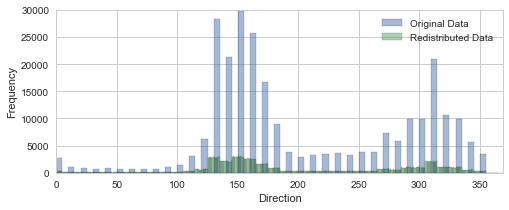

In [29]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


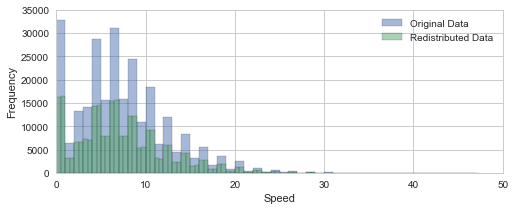

In [30]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [31]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [32]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [33]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-15
Sampling time used: [30, 0]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.330900e+04  43309.000000  43309.000000  43309.000000  43309.000000   
mean   2.012068e+07   1181.215683    208.660286      7.343892      6.522524   
std    1.414745e+04    691.740457     83.388072      4.491951      3.449584   
min    2.010010e+07     30.000000     -4.972849      0.000415      1.000000   
25%    2.011040e+07    630.000000    150.373883      3.813886      4.000000   
50%    2.012070e+07   1230.000000    171.105627      7.010396      7.000000   
75%    2.013100e+07   1830.000000    300.085138     10.021816     10.000000   
max    2.014123e+07   2330.000000    354.998539     28.702214     12.000000   

       dir_windrose             x             y  
count  43309.000000  43309.000000  43309.000000  
mean     330.341615     -2.307879      0.177556  
std      273.090628      6.869242      4.644048  
min        0.000000    -25.130264    -20.727556  
25%      140.000000     -7.109669     -2.883230  
50%      290.000000     -2.228109      0.573922  
75%      310.000000      2.929478      3.019064  
max      999.000000     27.618850     22.939133

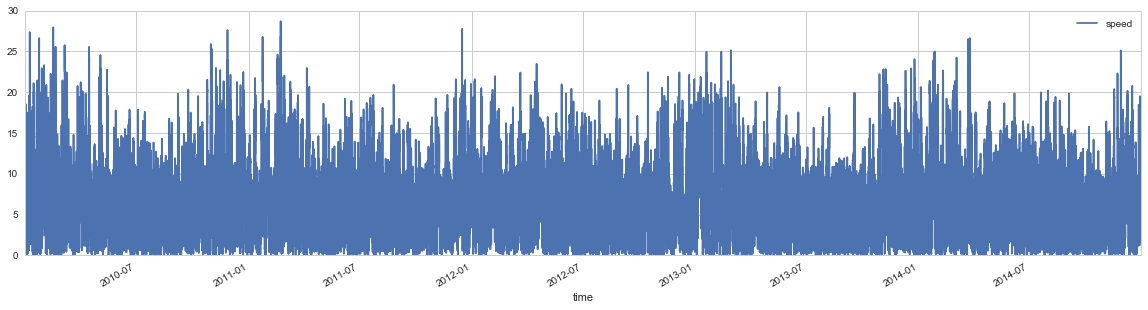

In [34]:
df.plot(y='speed',legend=True,figsize=(20,5))

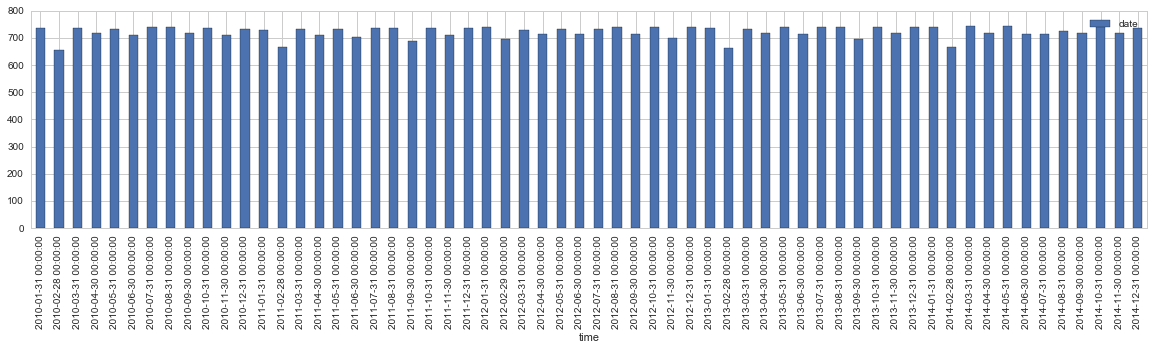

In [35]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


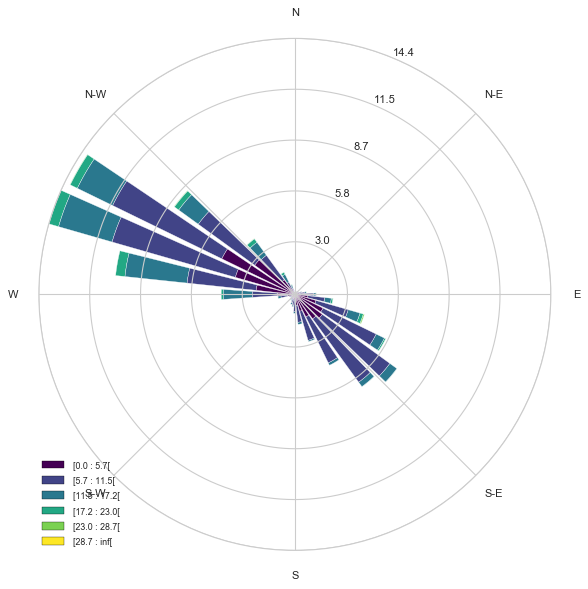

In [36]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [37]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [38]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlclFX///HXLIDAsLnhiguGmqYClmZu4ZK7JiiooaW/
UltcMhU1ScGttG4tzeVbtlAWiqVyZ7lRUqYEKCmaaWQY4MYmzKAOONfvD24mCURQZq5hOM/Hg0fM
HM51vRnt47WdcxSSJEkIgiCYmFLuAIIg1A6i2AiCYBai2AiCYBai2AiCYBai2AiCYBai2AiCYBYm
KzYGg4HQ0FACAwMJDg4mNTW1zM/cuHGDoKAgUlJSKt1HEISayWTF5uDBg+j1eiIjI5kzZw6rVq0q
1X7q1CkmTJjA33//Xek+giDUXCYrNomJifTq1QuALl26kJycXKpdr9ezYcMGWrduXek+giDUXGpT
bVir1aLRaIyvVSoVRUVFqNXFu/T19a1yn/IkJiZWY2pBEKqivP+P78ZkxUaj0aDT6YyvDQZDhUXj
fvtA1X5hc0hMTBSZKsESM4Fl5rLUTFVhstMoHx8fYmNjAUhKSsLLy8skfQRBqBlMdmQzYMAAjhw5
QlBQEJIksWLFCqKjoykoKCAwMLDSfQRBsA4mKzZKpZKwsLBS73l6epb5uYiIiAr7CIJgHcRDfYIg
mIUoNoIgmIUoNoIgmIUoNoIgmIUoNoIgmIUoNoJgYSZNmsTJkyeB4mE9vr6+REdHG9uDg4P57bff
yvSLjY0lMjKStLQ0xo4dW+n9PfHEE8btlgyKNgWT3foWqs5gMJCTk3PXdjc3N5RK8e+DOc2dO5cd
O3ZU6zbHjBnD6tWr79r+xBNPkJCQQKdOnUhMTKRnz578+uuvANy6dYv09HTatWtXpl/v3r0BSEtL
q9a81UX8zbUgOTk5fLIngaiYc2W+PtmTUGEhEqxHjx49SEhIAODw4cOMGTMGnU5Hfn4+J06c4LHH
HiM+Pp5x48bxzDPPsGDBAgoLC/nqq69Ys2YNANnZ2UybNo0xY8awYcMGAEJCQoxP6MfGxhISEmLW
30sc2Tyg48ePM23aNDp06MDQoUMZMGDAA23PUeOMk7NbNaUTHtTq1asrPAoxhYcffpg///wTSZKI
j4/n1VdfpWPHjvz888/8/vvv9OzZk8WLF7Nt2zbq1avH2rVr+frrr0uNIywoKGD16tU4ODgwYcIE
+vXrZ9bfoTyi2DyAK1euMHLkSNLS0oiPj+fjjz9GrVbTqVMnAgMDGTJkCB06dEChUMgdVahBlEol
7dq1IzY2lgYNGmBra0uXLl04fvw4Z8+eZcKECSxevJhZs2YBcPPmTXr06EGLFi2M22jXrh1OTk4A
PPLII1y4cKHUPuRYLk4Um/uk1+sJCAggLS2N5cuXM3DgQPbu3cs333xDfHw8x48fZ/78+TRv3pwh
Q4YwdOhQ+vbti16vv+s2s7OzEUsGClB83Wbz5s0MHToUgLZt23LgwAGg+Npdo0aNeP/993FycuLQ
oUM4ODhw6dIlY/+UlBR0Oh12dnacPHmSwMBAjh49yrVr1wA4c+aM2X8nUWzu08yZM/npp58YO3Ys
CxYsQKFQ0LVrV0JDQzlw4ACXL19m79697Nu3j82bN7N582ZsbW1p+VBHRgS+QJt2ncps8+rlNJxc
6uHsIk6jarsePXrw+uuv89ZbbwGgVqtxcnKiffv2KJVKFi1axAsvvIAkSTg6OvLWW2+VKjYuLi7M
nj2b7OxshgwZQps2bRgzZgwLFy4kOjqali1bmv13UtT05XflmOdjy5YtTJ06lc6dO3PkyBEcHR3v
mqmoqIi4uDj27t1LdHQ0p06dwlHjwvL1O2nQqGmpfpfS/0KltqWhe5My+8zPyyHAz4t69erdV2ZL
nQ/F0jKBZeayhkziblQVHTlyhJdffpl69eqxa9euMoXm39RqNU888QTLly/n+++/55mpIei013l3
xWyKCu9+SiUI1kYUmypIS0vD398fg8HA9u3b7+tQ9Am/4fTsN4I/z51i2wdrqj+kIFgoUWwq6ebN
m4wePZorV67w9ttv4+fnd1/bUSgUPPfKGzT18GTf7gjiftxXzUkFwTKJYlMJkiQxdepU4uPjmTRp
EjNmzHig7dWp48CMRWuxs7Nny38WcTnj3utjGQwGsrOzycrKuuuXwWB4oFyCYEriblQlrFu3jk8/
/ZTHHnuMTZs2VctzM81atGHyjCVsXD2fd5fPZsl/vqjw5wt0+ew4kEm9Bg3Lbddp85g0out9X0AW
ynevIST3o7YOOxHF5h4OHTrEa6+9RqNGjfjqq6+oU6dOtW27Z78RnE1O4PtvdxCxaSVD/J+t8Ocd
NE7i6WIzKxlC4qhxrpbt1eZ/FESxqcCff/7J2LFjUSqV7Ny5k6ZNm967UxVNnLaQlN9PEbM3kkZN
PXi056Bq34fwYOQYQhIXF8esWbNo06YNkiSRm5vLiy++yJAhQ8r9+YyMDM6ePXvf1xLNofYdy1WS
Tqdj1KhRZGdns2HDBnr06GGS/dja1WHmov9Qx8GRqE/f40olrt8ItUP37t2JiIjgs88+Y8GCBXzw
wQflTi0BcOzYMY4fP27mhFUjjmzKIUkSzz33HKdOnWL69Ok8//zzJt1fo6YteWHWMt5dMZuP14ex
fMNO6tRxMOk+hZqlTp06BAYGsnfvXj777DMuX77M1atX8fPzY8aMGWzZsoWbN2/i7e2Nk5MT69ev
R5IkdDodb7/9Nq1atZL7VxBHNuXZtGkTO3bsoFevXqxdu9Ys++zWexBP+A3ncvpffLw+3Cz7FGqW
evXqcebMGbp06cKHH35IVFQUX375JSqVihdeeIFhw4bRr18/zp8/z+rVq4mIiGDgwIF89913ckcH
xJFNubZu3YparSYyMhJbW1uz7Xf42P/HxQvn+PHgLtp3epQ+A0ebbd+C5cvIyMDb25tTp05x7Ngx
NBpNuQN73d3dWb58OQ4ODly5cgUfHx8Z0pYlis2/pKenk5CQQL9+/WjcuLFZ9622sWXSS4t5Z8mL
fLQ+jFZtOuDRuq1ZMwhl6bR5sm+roKCAHTt2EBAQwI0bNwgLCyM1NZXt27cjSRJKpdL4nNXixYs5
cOAAGo2G+fPnyzKdRHlMVmwMBgNLlizh999/x9bWlmXLlpWabyMmJoYNGzagVqvx9/dn7NixFBYW
EhISQnp6OkqlkvDw8HJX0TSlPXv2ADBq1Ciz7rdEvQaNmTZnJe8sfYl3l88i/L0o7B0qHn8lmI6b
mxuTRnSt9m1WxrFjxwgODkapVJKbm8srr7xCq1atmDNnDklJSdja2tKiRQuuXr2Kl5cXGzdupEOH
DowYMYIJEyZgb29P/fr1uXr1arXmv18mKzYHDx5Er9cTGRlJUlISq1atYuPGjQAUFhaycuVKoqKi
sLe3Z9y4cfj5+ZGUlERRURFffvklR44cYe3atbz33numiliu3bt3AzBixAiz7vdOvo/7MdR/Mt/s
3MpH7y3lxflvyZaltlMqlbI8E9OtWzeOHj1qfH3nCOuSfxDv5O7uzr59xUNfSubAsTQmKzaJiYn0
6tULgC5dupCcnGxsS0lJwcPDAxcXFwB8fX2Jj4/Hy8uL27dvYzAY0Gq1paY5vNe+qoNWq+XQoUO0
bduWa9euGScauh/lZcrNzeXy5TzytTfK7XPt6lVUKluKbkOvpwI5efwIR76PpsvjA3B0cjG2lUen
vU5SUgGurq5VyiQ3S8wElpnLEjNVhcmKjVarRaPRGF+rVCqKiopQq9VotVrjlIUAjo6OaLVaHBwc
SE9PZ/DgweTk5LBp06ZK7au65vmIjIykqKiIcePGPdA27zbPR1ZWFn9kn7vrA2IKSV9qPpvnXlpM
2GvPcCj6U6b

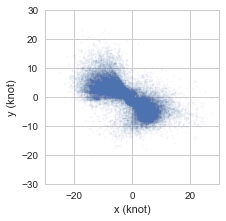

In [39]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [40]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [41]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAED1JREFUeJzt3XtQVOX/B/D37uIqgQpmYlODhYikI7CpIENAZqETmKCm
huZvtJSYmiQrsRQ0wQQrZ9QRBe9hpqTwzclsFCc1NUwQK7zlesFIYVEW2RXksvv5/eFwamXZ3SOL
K4fPa4YZzsNzzn4e9M257NnnyIiIwBizmdzRBTDW0XBoGBOJQ8OYSBwaxkTi0DAmEoeGMZEkFZrG
xkYsWbIEQUFBCAoKwvLly2EwGOzWHwD0ej3Gjh2L6urqVvskJydj4MCBJl9Llixptf/FixcxdepU
+Pv7IzIyEkeOHLE+WCveeuutFjVs3Lix1f6FhYWIiYmBn58fJkyYgD///FP42f79+/HJJ5+Ien2j
0YisrCy8/PLLUKlUmDx5MoqKisz2/eGHHzB+/PgHXv+hIwlJS0ujV155hYqLi+nYsWMUEhJCa9as
sVt/IqKUlBRat26dxT5TpkyhjIwM0mg0wpdOpzPbt66ujsLCwigpKYnUajWtWbOGhgwZQlevXrU+
YAtCQ0MpLy/PpIba2lqzfcvLy0mlUtHKlStJrVbT4sWLKSgoiG7fvi30mTBhAp04ccLm19+8eTMF
BgbSgQMH6MqVK5Senk4BAQFUVlZm0u/o0aPk7+9PMTExD7S+I0gmNHfv3iV/f3/Kz88X2nJzcyk4
OJgMBkOb+xMRaTQaCggIoOrqaou1BAYG0uHDh22qOy8vj4KDg6mhoUFomzZtGqWlpdm0vjk6nY58
fHxIrVbb1H/16tUUHR0tLBuNRho1ahRlZ2eb1Dlt2jSba4iKiqLMzEyTtoiICNq8ebOwnJaWRoMH
D6aoqKgWobFlfUeRzOHZuXPnUFdXh8DAQKFt2LBhuHXrFq5du9bm/gCwc+dOqFQq9OzZs9U6Kisr
UV1djWeffdamuk+dOgWVSoUuXboIbcOHD0dxcbFN65ujVqvh5OQET09Pm/oXFxdj+PDhwrJMJsPQ
oUNNahg5ciSKi4tx4cIFm7aZlJSE1157rUW7TqcTvi8oKMDWrVsRERHxQOs7imRCU1FRAWdnZ3Tv
3l1oe+KJJwAA5eXlbe4PAIcOHUJoaKjFOtRqNWQyGdavX4/w8HC8+uqr2LRpE4xGo9n+Go0Gffr0
MWnr3bs3KioqLL6OtRpcXV0xf/58vPDCCxg3bhzy8vJa7W9LDT179sSQIUNw+PBhm2oIDAxE3759
heVDhw7h6tWrCA4OFtry8vIwdOjQB17fUSQTmrq6OnTt2tWkTalUAgAaGhra3N9gMODs2bPw9va2
WMfly5chl8vh6emJrKwszJw5E2vWrMGGDRtE1W2uBltdunQJd+/eRXBwMDZs2IDo6GgkJSVh7969
barB29sbJSUloutRq9VITExEVFQUhg0b9tDXtzcnRxdgL926dWvxj9y87Ozs3Ob+1dXVMBgMcHd3
F9refvttkys6e/fuRWxsLCIjI+Hm5gYAGDhwIG7fvo0tW7Zg9uzZNtfRrVs3s+OMjIzE9evXhWVz
h3EfffQR3nnnHeEw0tfXF3///Teys7MRGRn5wDW4ubnh8uXLZutqTUlJCWbNmoUBAwZg6dKlota1
x/rtQTKh6du3L2pra6HX6+Hq6grg3vkFAHh4eLS5v0wmAwCTw6ylS5fi7t27wnKfPn0gk8mEwDTz
9vbGzZs3YTAYoFAoTH7m4eEhvG6zyspKszUAQFZWFpqamsz+rJlCoWhx3tW/f38cOnTIbH9bazAY
DJDLbT84OXnyJOLi4uDv74+MjIxW/xC01/rtRTKHZ76+vnB2djb5y19YWIjevXubPSEW29/d3R1O
Tk7QarVCm4eHB/r16yd8OTk5YenSpZgxY4bJuiUlJXjmmWdaBAYAVCoViouLTYJQWFgIlUpldpxP
PfWUyWua895772HBggUmbWfOnIGXl5fZ/iqVCoWFhcIyEQkXKP5Lq9UK533WnD9/HrNnz8bw4cOR
mZlpdu/dnuu3K0dfvrOnlJQUeumll6iwsJCOHz9OISEhJu+paLVa0mq1Nve/38SJE1tcBr1fQUEB
+fr6UmZmJpWWllJeXh4FBATQ999/T0RETU1NpNFoqK6ujoiI9Ho9hYSE0Pz580mtVlNGRgb5+fnR
tWvXHvj3kJeXR4MGDaJdu3ZRaWkpbdmyhQYPHkwnT54kIqL6+nrSaDRUX19PREQ3btwgf39/+uqr
r0itVtNnn31GI0aMoJqaGpPtxsTE0KZNm4jo3vtLGo2GmpqazNYQHR1NERERVFZWZvX9qlWrVrW4
5Cxm/YdNRuS4D6HZ+x3ehoYGbN26FQUFBejSpQvCwsIwZcoU4ZAiJSUFwL3Lmbb0v19ubi4uXryI
xMREi3X89ttvyM3NxY0bN+Du7o6xY8di1KhRAO4d9syZMwdxcXEIDw8HAFy9ehWbNm1CaWkpPDw8
MG3aNPj5+bXpd5Gfn499+/bh5s2b8PDwwOuvvy5cVj579ixSU1OxcOFCDBo0CMC9veHXX3+NiooK
eHp6YsaMGSZ7ptraWsTFxWH58uV48skncfjwYWRmZmLlypUt9j7l5eWYO3eu2boiIyMxdepUk7Zd
u3ahuLhYOGcRu357ae3KnkP3NIWFhY58edHKy8vJ39+fKisrRa3X0cZpzo4dO2j69OkmbbNmzWrx
u5DCWIksj0My5zQPg4eHB2JiYrBz505Hl/JQERG+/fZbxMfHC22nTp2CXC5H7969HViZY9gUmszM
TEyePBnjx4/Hd999h9LSUrzxxhuIjY3FokWLhCtKOTk5GD9+PCZNmoSff/65XQt3lLlz5+LHH3+0
eMOm1Pz000/w8fHBiBEjhDY/Pz+sXbvWgVU5kLXdVEFBAcXFxZHBYCC9Xk+rVq2iuLg4KigoICKi
pKQk2r9/P2k0GoqKiqL6+nqqqakRvn/QXaCUdJZxEklnrJbGYfV9mqNHj8LHxwfvvvsu9Ho95s2b
h5ycHOGerbCwMBw7dgxyuRwqlQpKpRJKpRKenp44f/681RPaR+Z273bWWcYJSH+sVkOj1Wpx/fp1
rFu3DmVlZYiPjwcRCW/2ubi4QKfTQa/Xm9zH5eLiAr1eb7WAVq9QSEhRUVGnGCcgnbFaCr7V0Li5
ucHLywtKpRJeXl7o2rWryQ2Nd+7cQY8ePeDq6oo7d+6YtP83RIxJhdULAUOHDsUvv/wCIkJFRQXq
6uoQHByMEydOAACOHDmCYcOGwc/PD0VFRaivr4dOp8OlS5fg4+PT7gNg7GGzuqcZOXIkTp48iYkT
J4KIkJycjKeffhpJSUlYsWIFvLy8MHr0aCgUCrz55puIjY0FEeGDDz5ocecsY1Jg0w2b8+bNa9G2
bdu2Fm2TJk3CpEmT2l4VY48wfnOTMZE4NIyJxKFhTCQODWMicWgYE4lDw5hIHBrGROLQMCYSh4Yx
kTg0jInEoWFMJA4NYyJxaBgTiUPDmEgcGsZE4tAwJhKHhjGRbArNrVu3EB4ejkuXLnXqiQIZA2wI
TWNjI5KTk4VngyxbtgwJCQnYvn07iAgHDx5EZWUlsrOzsWPHDmzcuBErVqxo05O8GHuUWQ1Neno6
pkyZIjyT8cyZMyYTBR4/fhx//PGHMFFg9+7dhYkCGZMiixNr5ObmolevXggNDUVWVhYA2HWiQED6
szE26yzjBKQ/Vouh2b17N2QyGX799VecO3cOiYmJqKqqEn5uj4kCpTAbozVSmXXSFlIZq6XgWzw8
++abb7Bt2zZkZ2fjueeeQ3p6OsLCwniiQNapiX5QbWJiIk8UyDo1m0OTnZ0tfM8TBbLOjN/cZEwk
Dg1jInFoGBO

## 2.3 Overview by Month

In [42]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl4W9WZ/z9Xu2R5kWXL+x7v2RMSEpIAYQsNLRRKW6bQ
0oWWzo9lpjMtZUnT0lJgygAtdKBTmBY6TJtShlJogYEEyEIg++J9t2VbtiRLthZr1/394UrEsZ3Y
yfUS8Pd59CS+955zz12+933Pe95FEEVRZB7zmMc5AdlsD2Ae85jH5DFP2HnM4xzCPGHnMY9zCPOE
ncc8ziHME3Ye8ziHME/YeczjHMI8YT8BmF+5+/hgnrAzgI0bN1JeXs5DDz007v6enh7Ky8spLy/H
4XBIeu63336brVu3xv9+4oknWLZsmaTn8Hg8XHzxxbzxxhuS9juPsZgn7AxBEATeeuutcfe9+eab
03be5557jv7+/mnr3+Px8I//+I/09vZO2znm8RHmCTtDWLZsGd3d3dTV1Y3Z98Ybb1BeXj4Lozo7
7Nu3j+uvv56GhobZHsonBvOEnSFUVlaSl5c3Rpr29vZy/PhxNm3aNKbNW2+9xXXXXcfSpUu58MIL
efzxxwmHw/H9Gzdu5Ne//jVbt25l1apVLF++nLvuuguPxwPATTfdxL59+3j33XcpLy+nu7s73vZv
f/sbV1xxBYsWLeLaa6/l0KFD8X3d3d2Ul5fzxBNPnPKa/t//+3+UlZXxzDPPnNE9mcfUMU/YGcTl
l18+Ri1+8803WbJkCZmZmaO2b9u2jdtuu43Fixfz5JNPcuONN/Jf//VffP/73x913K9+9StcLheP
Pvoo//RP/8Rf//pXnnrqKQC2bt1KVVUVy5cvZ9u2bZhMJgB8Ph+PPfYYd9xxBz//+c/x+Xzcfvvt
8Y+ByWRi27ZtXH/99ae8nhdeeIGf//znpKamntV9mcfkoZjtAXySsGnTJp599llaW1spKSkBRtTh
K6+8ctRxkUiExx9/nM2bN8cNRuvWrSMxMZGtW7fyjW98g4qKCgAyMzN59NFHEQSBdevW8d577/HM
M8+watUqLrzwQvR6PTqdju985zs8//zzwIjV+Gc/+xlLly4FIBwOc/vtt9PS0kJFRQUqlSq+71Qo
KyuT7N7MY3KYl7AziEWLFpGVlcX//d//AWCxWDh27BhXXHHFqOPa2tpwOBxj1OTNmzcDcODAgVF9
CoIQ/zs9PR0Yka5ut3vcccjlchYvXhz/OycnB2DC4+cxdzBP2BmEIAij1OI333yTxYsXk5WVNeq4
oaEhAIxG46jtiYmJqFSq+BwVQKvVjjmHXC5n3bp1PPjgg+OOQ61WI5N99Ohj/49Go2d4ZfOYKcwT
doZx+eWXU1tbS3d3N2+++eYYdRggJSUFgIGBgVHbXS4XwWAwvv9U+P73v8/evXsZHByUZuDzmBOY
J+wMY/ny5aSnp/OHP/yBo0ePjlGHAYqKijAYDGMcEf72t7/F+zgd9Ho9P/7xj+no6BhlWZ7HuY15
o9MMQyaTcdlll/Hb3/42Pqc9GXK5nNtuu40f//jHJCcnc8kll9DY2MgTTzzBpk2bJm3sWbduHenp
6Rw+fBitVksgEJhUu2AwSF1dHZmZmWOs1/OYXcxL2FnA5ZdfTigUGnftNYYbb7yRBx54gA8//JBb
b72VF154ga9+9as88sgjUzrX/fffj8/nw26309LSMqk2VquVL3zhC7z44otTOtc8ph/CfE6njxe6
u7v58pe/zI4dO+Lbdu/ezde//nW2b99Obm7uLI5uHmeLecLOYx7nEOZV4nnM4xzCPGHnMY9zCPOE
ncc8ziHML+t8DBCNRolEIvHMEqIoxv8vCMKon1wuH+XKOBv4zW9+w0svvQSMuFb+6Ec/oqOjg/vu
uw+Xy0VZWRkPPfQQOp1uVLtgMMjdd99NY2MjMpmM73//+6xdu3Y2LmHWMG90msMQRZFQKEQwGCQU
CsV/gUAgvi0cDk/ZpVAul6NUKlEqlahUKlQqVfxvpVKJWq1GoZieb/mxY8e499572bZtG1qtlu99
73tUV1fz8ssvc++997Jq1Sp+/vOfEw6H+Zd/+ZdRbV988UV2797Nz3/+cxobG7nlllvYuXPntIxz
rmJews4RiKJIMBhkeHgYr9eL1+tleHiYaDSKTCaL/xQKBQqFAq1WS3JyMmq1Ok66GMlkMhmRSIQj
R46wdOlSBEFAFEXC4TDBYJBAIBAnfeycMeJHo1FEUUSpVKLT6eLRPjqdThISJyUlsWXLlrj0rKio
oLGxEbfbzapVqwC4/vrruemmm8YQNhqNEggEiEQiBAIBNBrNWY/nXMM8YWcJ4XAYt9s9hpwKhQKl
UolWq8VoNJKcnIxSqTyrc8Wc++VyOWq1msTExAmPFUURn8/H0NAQXq8Xu91OKBQiGo2OInFCQgJ6
vX7K6nVhYSGFhYXAiK/0Cy+8wBe/+EU6Ojrix5hMpnHT2nz2s5/l5ZdfZv369fEY4E8a5gk7gwgE
AgwODuJ0OvF6vXHVVKfTkZ6eTnJyMnK5fFbHKAhCXKKeiGAwiNPpxOVyYbPZ6O3tRRAEkpOTSUlJ
mfLYu7u7+da3vsX111/PypUreeedd8aM42Q8+eSTLF26lN///vd0dHRw8803U11dHQ8P/CRgnrDT
CFEUGR4exul0Mjg4SCAQQKlUotfrycnJOaWkm2tQqVRkZGSQkZEBjKinDoeDgYEBurq6iEQiJCQk
kJqaGlfVJ0J9fT3f/OY3+eY3v8lNN91Eb28vNpstvt9ms43rw7x9+3Yee+wxBEGgqKiIJUuWcOzY
sXnCzuPMIYpiXJUcHBwkGo2iVqtJSUkhIyPjrNXbuQKZTEZaWhppaWkAeL1erFYrfX19mM1m1Go1
BoOB9PR0VCpVvJ3D4eAb3/gGW7du5fLLLwcgOzsbrVbLvn37WLVqFS+99BIXXnjhmHNWVFTw5ptv
UlZWhsPhoKamhn/+53+emQueI5i3EkuESCSC0+mkv7+fQCCAWq3GaDRiMplGBYvP5HhiRqeZVrMD
gQD9/f0MDg4SCoVITk7GZDKRmJjI448/zm9/+9v4PBbgoosuYvPmzWzZsgW3201ubi7//u//TmJi
Ir///e+xWq3ceeed2O12tmzZQmdnJ3K5nG984xtcffXVM3pts415wp4l/H4/VqsVu92OTCYjJSWF
nJycWZeks0nYE+HxeOjp6cHr9aJQKMjIyMBoNE7bstHHHfN37QwgiiKDg4P09/fj9XrRaDQUFBSQ
mpo6604Jcw16vZ7y8nIikQgWi4W+vj56enpITU3FZDKNMW7N49SYl7BTgCiKOBwOenp6iEQi6PV6
8vLy5uR64FyRsOPB6XTS29uL3+9Hr9eTm5tLQkLCbA/rnMC8hJ0ERFHE5XJhNpsJhUIYDAby8vLm
HBHOFRgMBgwGAz6fj87OThoaGuJTibn48ZtLmCfsaeDxeDCbzfh8PlJSUigoKJgnqkTQarVUVFTg
8/lob2+ntrYWo9FIdnb2KMvyPD7CPGEngM/no7u7G7fbTWJiIosWLZp1Q9LHFVqtlqqqKjweDx0d
HdTU1GAymcjMzJw3Tp2E+btxEsLhMGazGYfDgU6no7Kyckzu33lMD/R6PQsXLsThcNDd3Y3NZiMr
K4uMjIx5Y97fMU/YE+B0Ouns7EQmk1FaWkpSUtJsD+kTidTUVFJTU+nt7cViseBwOCguLp6f3zJP
WGBEqnZ2djI0NER6ejo5OTmz4uwwj9HIzs7GZDLR0tJCXV0d2dnZn3hp+4knrNPppKOjA6VSOa/+
SgiPx8MNN9zAU089RW5uLm1tbWzdujX+UXz00UdJTk4e1eaWW27BarUCI77KTU1N/Pa3v2XNmjXY
7fb4VOWTLG0

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1
   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
Wall time: 2min 43s


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 1089
[  3.15628591e-10   4.46717987e-08   8.22318804e-07   2.05223594e-06
   2.03512648e-06]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmQdGd1JvjcXCszq7L2NWuvTwghGZtPQnKHkTVWQEvI
YJvBbRuPiRGt8XR4MNgsBrQhBvEZiUXqCMutadQNuCWNJY3CPaAQEd02FhBeJBDfiG4kwYwqa8uq
yqVyq9yXe+/8KJ33e/PmXTNvVWWW7hNBIKluvvlm1b1Pnvec5zxHkGVZhgMHDhycUbhOewMOHDhw
cJxwSM6BAwdnGg7JOXDg4EzDITkHDhycaTgk58CBgzMNh+QcOHBwpuGQnAMHDs40HJJz4MDBmYZD
cg4cODjTcEjOgQMHZxoOyTlw4OBMwyE5Bw4cnGk4JOfAgYMzDYfkHDhwcKbhkJwDBw7ONBySc+DA
wZmGQ3IOHDg403BIzoEDB2caDsk5cODgTMMhOQcOHJxpOCTnwIGDMw2H5Bw4cHCm4ZCcAwcOzjQc
knPgwMGZhkNyDhw4ONPwnPYGHJw+ZFlGvV5Hs9mE2+2G1+uFy+WCIAinvTUHDrqGIMuyfNqbcHB6
qNVqyOfzGBoaQqPRAADs7e1hdHQUQ0NDcLlcDuk56Gs4kdwbGKIoolKpIJVKIRQKodlswuv1QpZl
yLIMURTRbDZRr9chCALcbrdDeg76Dg7JvQEhyzKazSZEUYQgCBBFEevr6xBFER6PB5IkoVwuw+/3
w+O5dIsQ6dVqNbhcLrjdbrjdbng8Hof0HPQsnOPqGwySJKHRaID+7Pv7+8hkMlhcXITP50O9Xkc8
HocgCGg0GvB4PAgGgwgEAggGg3C73S3r0TqCIDCy83g8bdc5cHBacCK5Nwjo+CmKIgCg2WwiFotB
kiR4vV4MDQ2hXq9jYGAAXq8Xw8PDCIVCqNVqKJfLyOfzSCQSjPSI+HgyazabkGUZtVoNyWQS09PT
8Pl8Duk5OFU4JPcGgCRJaDabkCQJgiCgUChgd3cXY2NjCIfD2N7ebrleEATIsgxBEDAwMICBgQGM
jY1BlmVUq1VUKhXkcjnE43F4vV5GeDzplUol1Ot1Rnp0vHUiPQcnDYfkzjgoj0bFhHg8jsPDQyws
LLBIzWzGQhAERmY86ZXLZeRyOezv78Pn8yEYDEKWZUaqwKU8oEN6Dk4aDsmdUUiSBFEUIUkSAKBe
r2NnZwc+nw9ra2usoNBNsYAnPXpPivQkScLOzg78fj/L5wUCAbhcR/pzh/QcnBQckjuDkCQJBwcH
yOfzWFxcRDabRTwex9TUFMbGxtqITRnJ0XHVKlwuF8vXHR4eYnZ2llVqM5kMqtUq/H5/y/FWj/SK
xSLC4TD8fr9Deg46hkNyZwx0PAWOiCMWi6FSqWBlZQUDAwNt1x+n7MPlcmFgYADBYBDAEflWKhVU
KhWk02nUajUMDAywSG9gYKCF9JLJJDweD5rNphPpOegYDsmdESi1b41GA8ViESMjI1hbW2PkofVa
4HgJDzgivVAohFAoBOAS6ZXLZRwcHDDSo0iPih8UWWodb30+n6PRc6AJh+TOAJTat4ODAySTSfh8
PkQiEd3XqpFDp8dVq1CSHnVgUBdGs9lEPB5HKBRikZ5RIYN6bx3Sc0BwSK7PQdEbcEQSu7u7aDab
mJmZweHhoak1ekUP7na7MTg4iMHBQQBANBpFOBxGvV5HMplEo9FoifTUSK/RaKBarTLSEwQBXq/X
Od6+geGQXJ9CeTwtFouIxWIYGRnB4uIiSqWSKfLSinjsIL5u1xAEAcFgECMjIwAuRXrlchmJRALN
ZpORXjAYhN/vbyO9/f19toYT6b0x4ZBcH4LXvgFAIpFANptFJBLB0NAQu65TkrGDAI6DRJSRXrPZ
ZKQXj8fRbDZb5Cp+v5/tRSvSc0jv7MMhuT6CLMtIp9Pwer0YGBhAo9FALBaDIAhYW1uD1+tl15p9
aE8q/3Yc8Hg8GBoaYsTOk14ul4Moiqzg4vf7WwoUPOlRTo+IzyG9swWH5PoE1JqVzWZZnmp3dxcT
ExOYmJhoeyi7Ja9+JD410tvb22P/L4pii9kAT3qSJLECDk96Ho8HHo/HIb0+hkNyfQBRFJmhJQBk
s1nU63UsLS0xDVqnIDIslUrI5/Ose+EsgAiKiK/RaLREepIkMcILBoMtERxPeo1GA4VCAdPT0w7p
9SEckuthKIsL1WoVxWIRfr8f586d060Ymo3k6JpYLIZwOIxcLodyuQyPxwNRFNs6E/oZXq8XXq8X
4XAYANBoNFAul1GpVJDJZCDLckukR6TXbDZRLpfZ8VYQBCfS6yM4JNej4J1DACCTySCRSGBgYADD
w8OGkggzJNdoNLCzswMAWF1dZf89mUyy9+U7Eyji4aUb/QyylBoeHoYsyy2RXiaTAQAEAgFmJEri
ZKA10nNIr7fhkFwPgte+SZKEvb09VKtVrKyssIevW/B2S+VyGV6vlx2JBUGAz+fD2NgY2wM9/Eq9
mlK6YSfskrGY2Rt9Zp/P10J65XIZhUIBtVoNGxsbqpEe4JBeL8MhuR6C8nhaLpexs7ODoaEh1ppl
9hiqdZ0sy0gkEsjlcpifn8fg4CBSqZTummqdCXTMU0o3KKFP79UtTosceNLzer3IZDKYnp5GuVxG
qVTCwcEBXC5Xi2RFi/SAI/kLfTkc15eCA3U4JNcjUGrfUqkUDg4OMDc3h+Hh4Y7WVJIMHU9dLhfO
nTvXMr+BhxGRut3utipmuVxuSejLsoxiscgG3/TzQy3LMuuR9fl8GBkZYWMcy+UyisUikskk3G53
C9nzEZwkSUgmkwiFQhgaGmoZCkSdGQ6OBw7JnTKosrm/v4/FxUWIoshsydfW1lhURLASyfGg4+n4
+Hib5KRbuYnH40E4HG5J6O/s7KBarSKfz7POBT7iOSmYPa5ahSAI8Pv98Pv9GB0dbSG9QqHASI//
3LzhgFqkR0OBHNKzFw7JnSKouEATsIiIRkdHMTU11VXzPF1Hx9N8Ps/cgI8bFJ1MTEzA7/ez3BYf
8fAPv1ZE2SswQ5RqpFer1VCpVHB4eIhEIsHckoFLBQ3l8bZerwNA21Agh/Q6R2/fXWcY/PGUrJF2
d3dZnkwLVqIuSZIQjUbhdrtb3IC11lT+vx3gc1vKYx49/HrDcXoBnfwu+PkYRHrb29vweDxtQ4H4
SWhEZjR0SDnz1iE963BI7oSh5vsWi8Ugy7Junky5hhGKxSIkSUI4HFbtiDgtqEU8/HAcfk4ERTfd
wK7jardrUMU1HA6zGRj0ufP5POLxOHw+X0shQ4v09vf3MTs72zIJrVf+vr0Ih+ROEMqpWfl8Hnt7
exgbG2MzTo1gdDNLksSOp4IgYHJy0tTeTquNSzkch+ZElMtlSJKE7e1tTffgk8Jx5PWsDAXiJ6EJ
goBKpcK6YJxIzxgOyZ0QeO2bLMvY29tDqVTC8vIykyiYgd5RkobVeDwerK6u4rXXXjO9pvLfu42g
gM6IUzknIhKJsOptKpVCvV5viXb6SZisR5Z6Q4Gy2Sz29/fZUCCqXtPrAOd4qweH5I4Zaq1ZOzs7
CAQCWFtbg9vthiiKlsYCql1LUeHk5CTGx8dZ0cHKPnvxQdByD+Y95ZQaPf5znKSg2M51eLIfHx9v
iXBlWcbm5qbqUCCe9JrNpkN6cEjuWKFsrE+n00gmk5iZmcHo6Cj771YS/cprJUlCPB5HoVBoa9i3
sqbdsIsUlNDzlFNruu8l8u5mLzzpZTIZrK6uolaroVwuGw4FAtRJr1arYXBw8Mx3ZDgkdwyQZRmi
KOLll1/GuXPnAAB7e3uo1+tYXV1lZo4Eq9VMurZWq7FZqkYN+2bWpBu9nzzmlPZKyqb7ZrOJdDqN
oaEh1oplFb1

In [50]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [51]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [52]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.402  -2.545   0.983  3.369  2.192  -0.839
2  0.310   4.978  -4.721  4.056  3.138   0.094
3  0.288  -9.824   4.330  4.066  3.685  -0.021

GMM Plot Result
0.401820032051 [[-2.54520991  0.98316471]] [ 1.03355114  3.88471789] -121.085686463
0.310185998442 [[ 4.97810328 -4.72130943]] [ 3.10408617  4.08207955] -80.0488709027
0.287993969507 [[-9.8241675   4.32989745]] [ 3.68075061  4.06981394] -95.9366721694


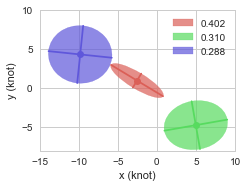

In [53]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [54]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUJHd1LvhF7lvt+761kIVkQI2QPMZCz7L1hNpgHpZt
jJexfHTejP14YAM2QkhCHEQbiUV4juXRPORj8EgaS7KwLXTAc7CxQLYxoHY/4UESHLqyuqqyqnKp
3Cr3JSLmj+L++peREZERmZFVmaX4ztFRd1fkLyOyIr68v3u/+11BlmUZNmzYsHFC4TjuE7Bhw4aN
bsImORs2bJxo2CRnw4aNEw2b5GzYsHGiYZOcDRs2TjRskrNhw8aJhk1yNmzYONGwSc6GDRsnGjbJ
2bBh40TDJjkbNmycaNgkZ8OGjRMNm+Rs2LBxomGTnA0bNk40bJKzYcPGiYZNcjZs2DjRsEnOhg0b
Jxo2ydmwYeNEwyY5GzZsnGjYJGfDho0TDZvkbNiwcaJhk5wNGzZONGySs2HDxomGTXI2bNg40bBJ
zoYNGycaNsnZsGHjRMN13Cdg4/ghyzKq1Srq9TqcTifcbjccDgcEQTjuU7Nho2MIsizLx30SNo4P
lUoF2WwWAwMDqNVqAIDd3V2MjIxgYGAADofDJj0bfQ07knsVQxRFlEolJBIJBINB1Ot1uN1uyLIM
WZYhiiLq9Tqq1SoEQYDT6bRJz0bfwSa5VyFkWUa9XocoihAEAaIoYn19HaIowuVyQZIkFItFeL1e
uFyXbhEivUqlAofDAafTCafTCZfLZZOejZ6FvV19lUGSJNRqNdCvfW9vD6lUCouLi/B4PKhWq4hG
oxAEAbVaDS6XC4FAAH6/H4FAAE6ns2E9WkcQBEZ2Lper6TgbNo4LdiT3KgFtP0VRBADU63VEIhFI
kgS3242BgQFUq1X4fD643W4MDQ0hGAyiUqmgWCwim80iFosx0iPi48msXq9DlmVUKhXE43FMTU3B
4/HYpGfjWGGT3KsAkiShXq9DkiQIgoBcLoednR2Mjo5icHAQW1tbDccLggBZliEIAnw+H3w+H0ZH
RyHLMsrlMkqlEjKZDKLRKNxuNyM8nvQKhQKq1SojPdre2pGejaOGTXInHJRHo2JCNBrFwcEBFhYW
WKRmNGMhCAIjM570isUiMpkM9vb24PF4EAgEIMsyI1XgUh7QJj0bRw2b5E4oJEmCKIqQJAkAUK1W
sb29DY/Hg7W1NVZQ6KRYwJMevSdFepIkYXt7G16vl+Xz/H4/HI5D/blNejaOCjbJnUBIkoT9/X1k
s1ksLi4inU4jGo1icnISo6OjTcSmjORou2oWDoeD5esODg4wMzPDKrWpVArlchler7dhe6tHevl8
HoODg/B6vTbp2WgbNsmdMND2FDgkjkgkglKphJWVFfh8vqbjuyn7cDgc8Pl8CAQCAA7Jt1QqoVQq
IZlMolKpwOfzsUjP5/M1kF48HofL5UK9XrcjPRttwya5EwKl9q1WqyGfz2N4eBhra2uMPLReC3SX
8IBD0gsGgwgGgwAukV6xWMT+/j4jPYr0qPhBkaXW9tbj8dgaPRuasEnuBECpfdvf30c8HofH48Hc
3Jzua9XIod3tqlkoSY86MKgLo16vIxqNIhgMskivVSGDem9t0rNBsEmuz0HRG3BIEjs7O6jX65ie
nsbBwYGhNXpFD+50OhEKhRAKhQAA4XAYg4ODqFariMfjqNVqDZGeGunVajWUy2VGeoIgwO1229vb
VzFskutTKLen+XwekUgEw8PDWFxcRKFQMEReWhGPFcTX6RqCICAQCGB4eBjApUivWCwiFouhXq8z
0gsEAvB6vU2kt7e3x9awI71XJ2yS60Pw2jcAiMViSKfTmJubw8DAADuuXZKxggC6QSLKSK9erzPS
i0ajqNfrDXIVr9fLzkUr0rNJ7+TDJrk+gizLSCaTcLvd8Pl8qNVqiEQiEAQBa2trcLvd7FijD+1R
5d+6AZfLhYGBAUbsPOllMhmIosgKLl6vt6FAwZMe5fSI+GzSO1mwSa5PQK1Z6XSa5al2dnYwPj6O
8fHxpoeyU/LqR+JTI73d3V32f1EUG8wGeNKTJIkVcHjSc7lccLlcNun1MWyS6wOIosgMLQEgnU6j
Wq1iaWmJadDaBZFhoVBANptl3QsnAURQRHy1Wq0h0pMkiRFeIBBoiOB40qvVasjlcpiamrJJrw9h
k1wPQ1lcKJfLyOfz8Hq9OHXqlG7F0GgkR8dEIhEMDg4ik8mgWCzC5XJBFMWmzoR+htvthtvtxuDg
IACgVquhWCyiVCohlUpBluWGSI9Ir16vo1gssu2tIAh2pNdHsEmuR8E7hwBAKpVCLBaDz+fD0NBQ
S0mEEZKr1WrY3t4GAKyurrJ/j8fj7H35zgSKeHjpRj+DLKWGhoYgy3JDpJdKpQAAfr+fGYmSOBlo
jPRs0utt2CTXg+C1b5IkYXd3F+VyGSsrK+zh6xS83VKxWITb7WZbYkEQ4PF4MDo6ys6BHn6lXk0p
3bASVslYjJwbXbPH42kgvWKxiFwuh0qlgo2NDdVID7BJr5dhk1wPQbk9LRaL2N7exsDAAGvNMroN
1TpOlmXEYjFkMhnMz88jFAohkUjorqnWmUDbPKV0gxL69F6d4rjIgSc9t9uNVCqFqakpFItFFAoF
7O/vw+FwNEhWtEgPOJS/0JdDt74UbKjDJrkegVL7lkgksL+/j9nZWQwNDbW1ppJkaHvqcDhw6tSp
hvkNPFoRqdPpbKpiFovFhoS+LMvI5/Ns8E0/P9SyLLMeWY/Hg+HhYTbGsVgsIp/PIx6Pw+l0NpA9
H8FJkoR4PI5gMIiBgYGGoUDUmWGjO7BJ7phBlc29vT0sLi5CFEVmS762tsaiIoKZSI4HbU/Hxsaa
JCedyk1cLhcGBwcbEvrb29sol8vIZrOsc4GPeI4KRrerZiEIArxeL7xeL0ZGRhpIL5fLMdLjr5s3
HFCL9GgokE161sImuWMEFRdoAhYR0cjICCYnJztqnqfjaHuazWaZG3C3QdHJ+Pg4vF4vy23xEQ//
8GtFlL0CI0SpRnqVSgWlUgkHBweIxWLMLRm4VNBQbm+r1SoANA0FskmvffT23XWCwW9PyRppZ2eH
5cm0YCbqkiQJ4XAYTqezwQ1Ya03l/60An9tSbvPo4dcbjtMLaOez4OdjEOltbW3B5XI1DQXiJ6ER
mdHQIeXMW5v0zMMmuSOGmu9bJBKBLMu6eTLlGq2Qz+chSRIGBwdVOyKOC2oRDz8ch58TQdFNJ7Bq
u9rpGlRxHRwcZDMw6Lqz2Syi0Sg8Hk9DIUOL9Pb29jAzM9MwCa1Xfr+9CJvkjhDKqVnZbBa7u7sY
HR1lM05bodXNLEkS254KgoCJiQlD53ZcbVzK4Tg0J6JYLEKSJGxtbWm6Bx8VupHXMzMUiJ+EJggC
SqUS64KxI73WsEnuiMBr32RZxu7uLgqFApaXl5lEwQj0tpI0rMblcmF1dRUXLlwwvKby751GUEB7
xKmcEzE3N8eqt4lEAtVqtSHa6Sdhsh5Z6g0FSqfT2NvbY0OBqHpNrwPs7a0ebJLrMtRas7a3t+H3
+7G2tgan0wlRFE2NBVQ7lqLCiYkJjI2NsaKDmfPsxQdByz2Y95RTavT46zhKQbGV6/BkPzY21hDh
yrKMixcvqg4F4kmvXq/bpAeb5LoKZWN9MplEPB7H9PQ0RkZG2L+bSfQrj5UkCdFoFLlcrqlh38ya
VsMqUlBCz1NOrem+l8i7k3PhSS+VSmF1dRWVSgXFYrHlUCBAnfQqlQpCodCJ78iwSa4LkGUZoiji
pZdewqlTpwAAu7u7qFarWF1dZWaOBLPVTDq2UqmwWaqtGvaNrEk3ej95zCntlZRN9/V6HclkEgMD
A6wVyyx6jSi

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHudJREFUeJztnXtQVOf5x7+HvSBXEVjBKNiIRoM/YoIW08aYQMYydbTj
DBpEZRp1JpWqqa2poFXRghjr5R+rtsXaxAvRSjuNzmSSWjXamKrRDARdRcXITcQVJHLfZff8/ljO
4exyzl5gb2d5PjNnhj3nvOd9DuyX57087/MyLMuyIAhCNgR42wCCIJyDREsQMoNESxAyg0RLEDKD
REsQMoNESxAyQ+ltAwbC9evXvW0C4eNMnTrV7j1lZWdhNEaIXlOr1UhKSnK1WS5BlqIFgBNbz7u9
jtbWVoSFhbm9nsEiFzsBz9iamZ/q0H1GYwTi4otEr9XWbHClSS6FmscEITNItAQhM0i0BCEzSLQE
ITNItAQhM0i0BCEzSLQEITNItAThJCaTCZs3b0ZmZiays7NRXV1tcf3cuXPIyMhAZmYm/v73v1tc
Ky8vR3Z2Nv9Zq9Xi9ddfR3Z2NrKzs/Hpp5/arV+2wRUE4S3+85//QK/X48SJEygrK8MHH3yAAwcO
AAAMBgO2b9+O0tJSBAUFISsrC2lpaYiOjkZxcTFOnTqFoKAg/lk3b97E0qVLsWzZMofrJ09LEE5y
/fp1vP766wCAl19+GTdu3OCvVVVVIT4+HsOHD4darcbUqVPx9ddfAwDi4+Oxd+9ei2fduHEDX3zx
BRYvXowNGzagra3Nbv0kWmJI81R/R/SwRVtbG0JDQ/nPCoUCPT09/DVhmGZISAgvxPT0dCiVlo3b
l156CevWrcOxY8cQFxeHffv22bWZmsfEkKYWM0TPj7BRJjQ0FO3t7fxnk8nEi9H6Wnt7u81Y61mz
ZiE8PJz/uaCgwK7N5GkJwkmSk5Nx8eJFAEBZWRleeOEF/lpCQgKqq6vR0tICvV6Pa9eu4ZVXXpF8
1vLly/Htt98CAP73v/9h8uTJdusnT0sQTjJr1ixcunQJCxcuBMuyKCoqwunTp9HR0YHMzEzk5eVh
+fLlYFkWGRkZiImJkXzWli1bUFBQAJVKhejoaIc8LYmWIJwkICAAv//97y3OJSQk8D+npaUhLS1N
tOyYMWMspoEmT56M48ePO1e/U3cTBOF1SLQEITNItAQhM0i0BCEzSLQEITO8Ilph0HR1dTWysrKw
aNEi5Ofnw2QyecMkgpANHhdtcXExNm7ciO7ubgDA9u3bsWbNGpSUlIBlWZw9e9bTJhGErPC4aK2D
pm/evImUlBQAwMyZM/HVV1952iRiCFPXUS16+DIeD65IT09HXV0d/5llWTAMA8AcXN3a2urQcxy9
b7B4qp7BIhc7Ad+y9Sn7mrdNcBqvR0QFBPQ5+/b2dj542h6eSM4tlyTgcrETkJetvorXR48TExNx
5coVAMDFixcxbdo0L1tEEL6N10Wbm5uLvXv3IjMzEwaDAenp6d42iSB8Gq80j4VB088//zyOHj3q
DTMIQpZ43dMSBOEcJFqCkBkkWoKQGSRagpAZXp+n9VWqGtthNLJ43NFu/2YREmJCXGwR4SuYTCZs
2bIFlZWVUKvVKCwsxNixY/nr586dw759+6BUKpGRkYG3336bv1ZeXo5du3bhyJEjAIBbt26hoKAA
CoUCarUaO3bsQHR0tM36SbS9VDVaijMhKQ6trW0ICwuVKGHjWRW1Fs8jAfsXrkxWvm3bNmzatAkv
vvgijh8/juLiYqxfv95m/UNetBbiSopzyTOFz+EETML1Te62PhQ9P9NGGUeTlQPgk5X/9Kc/5ePu
161bx9+/Z88ejBw5EgBgNBoRGBho1+YhK1p3iFWMhKQ4Eq4Po0CS02WkkpUrlUq7ycqFcfcAeMF+
8803OHr0KI4dO2a3/iEnWk+JVQgJ179wZbJyAPj0009x4MAB/OUvf0FkZKTd+ofE6HFVYzt/JCTF
8Ycn4eqz7jsT8sOVyco/+eQTHD16FEeOHEFcnGPfSb/3tJxI3C1SbfP3/M+JkcNF7yGP6x+4Klm5
0WjEtm3bMGrUKKxevRoA8MMf/hDvvfeezfr9VrSeEKtQqACQMGkUqm439DsvFDEJV/64Klm5QqHA
1atXna7fL0XrLsFaixEwC9XWZ07EJFzCVfidaN0hWKFYrUVpD+5+7e0GAH1el+/jVtSScAmn8DvR
Au4RrC2xVrQ0SV5LioiyKC8mXhIu4Qx+JVpudNgVaJu/h9FoxAuTx4hetxbq+HEjxe+7/xiApXjF
mszUVCYcxW+mfFw5lcJ511Hx4qPAnGDHjxvJH1Jw1ypamviD97qcF6fpIMIJ/MrTDtbLWjeFxbIG
VrQ0iYq0olUn/WANg6QwDQDg3v3HqGhpQpKVx6XBKcJR/EK0rvBQ9vquQu9qcV4g1olxGtGylbW6
vvs0DIJ0LAmXGDB+IVpgcF52IILlRCgUanlXo3gFGmDKMPMEe2WtDp0C4SJWjeBHehKul9A+lfib
jfCsHc7gkGhbW1tRU1ODgIAAjBkzxq/y1rpCsEKxvjiqf9P5VsPjvns0wDBdADp7m8z37j9GR6wa
SRFR0N5uIOF6mBgmwf5NPoZN0V64cAEHDx7EvXv3EBsbC6VSiYaGBiQkJGDZsmV44403PGWnW3Bk
OgcQHxm2bgqLiVVrqAcAJI4azZ+71fAYXRoThukCzOK3ai7zU0KCeVyA1uQSfUiKNi8vD9HR0di8
eTMmTJhgce3u3bsoLS3F6dOnsWvXLrcbaYvB9medDZawxrpJzAlV8lw0wDxRoUtj3h1Q6HUr7j+m
5jJhF0nR/vrXv5YMdJ4wYQLWr1+PR48euc0wZxhIf1YsJNERKlp1kl6W96wa8QEpANDqdGCjDUhU
jea97pRhMaio7fO6wuYyQF6XsERynpYTbEFBQb9rubm5AIDY2Fg3meUZXOllxQTbyFb1OxI1GiRq
NNAa6sFGG/DiqJEo72rkPW+nhsH4cSNR0dKEjli1+dk0n0sIkPS0v/vd71BbW4sbN27g7t27/Pme
nh6f2vXMV2lkqwAAiSMsWyvap73nNeYBEK2uHogG2vV6AGYPWqFz3OsCwMhgt74K4WNIijYnJwf1
9fXYtm0bVq1axZ9XKBQWy5CGAvfuP+YHo5LCNKioNTeRpwyLQXlXI241PEbiqNHQGuqh1emQqNHw
o5K8SHvFmzgiBtqnjX2i5sVrbjZz4u3oNiAS5nxBFTrLqSHAUrwNreaskdRsHhpINo/HjBmD6dOn
49SpU4iIiMCdO3eg1WoRHByMiIgIT9roNqp6vZctuJjhe70xxByVteZpH27+FQASVeZRYq2uL+Ci
T7x9TenEETG8iLlmc1T0MyRqNAhRq8FGG2DS6NGlMaE5vBudGgbNoQZ0xKpFQyBHJZhTblKzeWhg
N/b4k08+wS9/+UvU1dXh4cOHWLlyJUpLSz1hm1uRyi4hhrVwuZBETriAeSoHcFy4QJ94uYMTb1T0
M168wYHmkeagIDU6NUy/vq5QvAlJcXxaHcJ9mEwmbN68GZmZmcjOzkZ1teXO8efOnUNGRgYyMzP5
Be9SZW7evIn58+dj0aJFKCgogMlkslu/XdEeOnQIJ0+eRF5eHjZs2IDS0lJ8+OGHA3hV9yHs3zld
9nbDgDyuULict73V8NjcVBYIlxOvULhSUThCD8yJl402oC283cLrAkBHrJoX74MuPf8MGqxyP8K8
x2vXrsUHH3zAX+PyHh86dAhHjhzBiRMn8OTJE8kymzZtwoYNG1BSUoLQ0FCcPn3abv12RWsymTBi
RF9MV2RkJBiGGci7ugWuHzcQ4SZGDucPTry2BGxLuMN0ARbiZZ6o+om36Un4gMRr3WTu1DAWTean
EQGWC/VJuG7

## Goodness-of-fit Statistics

In [55]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.930  0.029      0.154  2.675948e-07      0.032       0.575

# 6. GMM by Optimization

In [56]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [57]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.782647575792051
     jac: array([  1.38966846e+00,   1.19209290e-07,   2.38418579e-07,
         1.19209290e-07,  -1.19209290e-07,   2.38418579e-07,
         1.38966811e+00,   1.19209290e-07,   1.19209290e-07,
         0.00000000e+00,   1.19209290e-07,   0.00000000e+00,
         1.38966751e+00,   3.57627869e-07,   5.96046448e-07,
         3.57627869e-07,   2.38418579e-07,   1.54972076e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 630
     nit: 31
    njev: 31
  status: 0
 success: True
       x: array([  3.46747725e-01,  -8.87183658e+00,   3.38024534e+00,
         4.35765611e+00,   2.95831433e+00,   2.40221872e-03,
         2.79845575e-01,   5.10775198e+00,  -5.13933669e+00,
         3.06364950e+00,   2.75698891e+00,   9.23811940e-02,
         3.73406700e-01,  -1.96017464e+00,   6.69307511e-01,
         3.40186728e+00,   2.30618677e+00,  -8.06395418e-01])

## 6.1 GMM Result

In [58]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.373  -1.960   0.669  3.402  2.306  -0.806
2  0.347  -8.872   3.380  4.358  2.958   0.002
3  0.280   5.108  -5.139  3.064  2.757   0.092

GMM Plot Result
0.373406700479 [[-1.96017464  0.66930751]] [ 1.17834474  3.93734709] -121.848628743
0.346747725015 [[-8.87183658  3.38024534]] [ 2.95829849  4.35766686] -89.8266868931
0.279845574507 [[ 5.10775198 -5.13933669]] [ 2.70332789  3.11110181] -69.4184448013


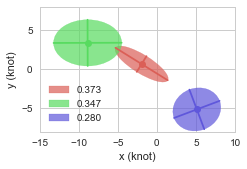

In [59]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [60]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.963  0.035      3.233  1.398567e-07      0.023       0.416

In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUK2d9JvyU9qVb3ep9X6/tD5tAbGMuDgQmnrB5khCG
sGYyYfA3GXJyYFhmAsYY89m+wSTBhhMSJzgLie3EJp4hwABDApiYmAA2xjh4vff2qtbWLam1b7V8
f/R9336rVFWqKpW6pXY953DMbVW99UqqevRbnx8nSZIEBw4cODihcB33Bhw4cOCgm3BIzoEDByca
Dsk5cODgRMMhOQcOHJxoOCTnwIGDEw2H5Bw4cHCi4ZCcAwcOTjQcknPgwMGJhkNyDhw4ONFwSM6B
AwcnGg7JOXDg4ETDITkHDhycaDgk58CBgxMNh+QcOHBwouGQnAMHDk40HJJz4MDBiYZDcg4cODjR
cEjOgQMHJxoOyTlw4OBEwyE5Bw4cnGg4JOfAgYMTDYfkHDhwcKLhkJwDBw5ONBySc+DAwYmGQ3IO
HDg40fAc9wYcHD8kSUKj0QDP83C73fB6vXC5XOA47ri35sBBx+AkSZKOexMOjg/1eh35fB6Dg4No
NpsAgHg8jmg0isHBQbhcLof0HPQ1HEvueQxBEFCtVrG7u4twOAye5+H1eiFJEiRJgiAI4HkejUYD
HMfB7XY7pOeg7+CQ3PMQkiSB53kIggCO4yAIAs6fPw9BEODxeCCKIiqVCvx+Pzyew1uEkF69XofL
5YLb7Ybb7YbH43FIz0HPwnFXn2cQRRHNZhPka08kEshms1hYWIDP50Oj0UAymQTHcWg2m/B4PAiF
QggGgwiFQnC73bL1yDocx1Gy83g8Lcc5cHBccCy55wmI+ykIAgCA53nEYjGIogiv14vBwUE0Gg0E
AgF4vV4MDQ0hHA6jXq+jUqkgn88jlUpR0iPEx5IZz/OQJAn1eh3pdBqTk5Pw+XwO6Tk4Vjgk9zyA
KIrgeR6iKILjOBSLRezs7GBkZASRSARbW1uy4zmOgyRJ4DgOgUAAgUAAIyMjkCQJtVoN1WoV+/v7
SCaT8Hq9lPBY0iuXy2g0GpT0iHvrWHoOjhoOyZ1wkDgaSSYkk0kUCgXMz89TS81oxILjOEpmLOlV
KhXs7+8jkUjA5/MhFApBkiRKqsBhHNAhPQdHDYfkTihEUYQgCBBFEQDQaDSwvb0Nn8+H1dVVmlDo
JFnAkh65JrH0RFHE9vY2/H4/jecFg0G4XAf15w7pOTgqOCR3AiGKIvb29pDP57GwsIBcLodkMomJ
iQmMjIy0EJvSkiPuqlm4XC4arysUCpienqaZ2mw2i1qtBr/fL3Nv9UivVCohEonA7/c7pOfAMhyS
O2Eg7ilwQByxWAzVahXLy8sIBAItx3ez7MPlciEQCCAUCgE4IN9qtYpqtYpMJoN6vY5AIEAtvUAg
ICO9dDoNj8cDnucdS8+BZTgkd0KgrH1rNpsolUoYHh7G6uoqJQ+tc4HuEh5wQHrhcBjhcBjAIelV
KhXs7e1R0iOWHkl+EMtSy731+XxOjZ4DTTgkdwKgrH3b29tDOp2Gz+fD7Oys7rlq5GDVXTULJemR
DgzShcHzPJLJJMLhMLX02iUySO+tQ3oOCByS63MQ6w04IImdnR3wPI+pqSkUCgVDa/RKPbjb7cbA
wAAGBgYAAGtra4hEImg0Gkin02g2mzJLT430ms0marUaJT2O4+D1eh339nkMh+T6FEr3tFQqIRaL
YXh4GAsLCyiXy4bIS8visYP4Ol2D4ziEQiEMDw8DOLT0KpUKUqkUeJ6npBcKheD3+1tIL5FI0DUc
S+/5CYfk+hBs7RsApFIp5HI5zM7OYnBwkB5nlWTsIIBukIjS0uN5npJeMpkEz/OychW/30/3omXp
OaR38uGQXB9BkiRkMhl4vV4EAgE0m03EYjFwHIfV1VV4vV56rNGH9qjib92Ax+PB4OAgJXaW9Pb3
9yEIAk24+P1+WYKCJT0S0yPE55DeyYJDcn0C0pqVy+VonGpnZwdjY2MYGxtreSg7Ja9+JD410ovH
4/S/giDIxAZY0hNFkSZwWNLzeDzweDwO6fUxHJLrAwiCQAUtASCXy6HRaGBxcZHWoFkF26fK/u0k
gBAUIb5msymz9ERRpIQXCoVkFhxLes1mE8ViEZOTkw7p9SEckuthKJMLtVoNpVIJfr8fp06d0s0Y
9rMb2i14vV54vV5EIhEAQLPZRKVSQbVaRTabhSRJMkuPkB7P86hUKtS95TjOsfT6CA7J9ShY5RAA
yGazSKVSCAQCGBoaalsSYZTk2BiV2XP7HURSamhoCJIkySy9bDYLAAgGg1RIlLV4WUvPIb3ehkNy
PQi29k0URcTjcdRqNSwvL9OH7/kAu8pYjBAOx3Hw+Xzw+Xwy0qtUKigWi6jX61hfX1e19ACH9HoZ
Dsn1EJTuaaVSwfb2NgYHB2lrlhkLzYyEEnlAWbnzTmEHSR0XObCk5/V6kc1mMTk5iUqlgnK5jL29
PbhcLlnJihbpAQflL6SYma3nc9B9OCTXI1DWvu3u7mJvbw8zMzMYGhqytKZRkpEkCRsbG7Ksos/n
Q7PZlJWlmMFJeoglSaKfic/nw/DwMB3jWKlUUCqVkE6n4Xa7ZYkM1oITRRHpdBrhcBiDg4OyoUCk
M8NBd+CQ3DFDkiSUy2UkEgksLCxAEAQqS766ugqfzyc73mysrR1I69fg4CDm5ubQbDaRTqfRaDSw
ubkJt9tNH1q1GQ+9DqPuqllwHAe/3w+/349oNCojvWKxSEmPlYpnBQfULD0yFMghPXvhkNwxgiQX
yAQsIksejUYxMTHRUfN8u+MkSUIqlUI+nwfHcRgdHYUgCPD5fLQndGRkBPV6HdVqFYVCAalUSlPu
/CTDCFGqkZ7ysyNqycBhQkPp3jYaDQBoGQrkkJ51OCR3TGDdUyKNtLOzg7m5Odq2pAYzsTat44hK
sMfjwerqKs6ePUv3ofwvmfFAHlwid57L5ZBIJKgIplIP7iTBSmxR7bPb2tqCx+NpGQrETkIjZEaG
Diln3jqkZx4OyR0x1HTfYrEYJEnCqVOnDAX+O3FXC4WCbqdEuzWJBTc6OkrlztX04EjJxXHDLne1
0zVIxjUSidAZGEQqPp/PI5lMwufzyRIZWqSXSCQwPT0tm4TmkJ42HJI7QiinZuXzecTjcYyMjBjO
bFrtSWXdU7VOiU7lzgG5SggZecjG8/pV3LIbcT0zQ4HY0ADHcahWq7QLxrH02sMhuSMCW/smSRLi
8TjK5TKWlpZoiYIRWCnUVbqnSjJV63slsSMzYFVCqtUqRkdHIUmSoTaq5wP0yFJvKBAbGggGgzIr
2XFv28MhuS5DrTVre3sbwWAQq6urcLvdEATBVE2bmcSDUfe0G9YKKakgDfPKNioAsuyj1XIVPRxl
QbGd67BWsjI0QEp+1IYCsaTH87xDenBIrqtQNtZnMhmk02lMTU0hGo3Sv5st3DWTeEgkEm0b+btV
YqGEWhsVqTPb3d2VPdik5KJbezkOdEKW7GeTzWaxsrKCer2OSqXSdigQoE569XodAwMDJ74jwyG5
LkCSJAiCgCeffBKnTp0CAMTjcTQaDaysrFAxRwKzLmi7Y4l7CkDVPdVak9zoR9G7ynYUKItrScmF
KIrIZDIYGBg41nKVbtXaWQH5XpTxUK2hQHqkt7GxgcXFRVqQTIqTWYvwJMAhOZuhbKwvl8tIJpOI
RCKYm5trOzXLSD2WHoh7Oj4+jmq1aogYeuGGVqszO3/+PNxud0flKr2Q4SWwgyzZgmIWepPQdnd3
0Wg0ZFLxgUAAkiTR+0PN0iPFyf1Oeg7J2QhlaxZprp+dnaXyPmogN61RklN7cCVJQjKZRKFQoO5p
Mpk0/GAp1zx

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC0CAYAAAB4zKuwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHudJREFUeJztnXtQVOf5x7+HvSBXEVjBKNiIRoM/YoIW08aYQMYydbTj
DBpEZRp1JpWqqa2poFXRghjr5R+rtsXaxAvRSjuNzmSSWjXamKrRDARdRcXITcQVJHLfZff8/ljO
4exyzl5gb2d5PjNnhj3nvOd9DuyX57087/MyLMuyIAhCNgR42wCCIJyDREsQMoNESxAyg0RLEDKD
REsQMoNESxAyQ+ltAwbC9evXvW0C4eNMnTrV7j1lZWdhNEaIXlOr1UhKSnK1WS5BlqIFgBNbz7u9
jtbWVoSFhbm9nsEiFzsBz9iamZ/q0H1GYwTi4otEr9XWbHClSS6FmscEITNItAQhM0i0BCEzSLQE
ITNItAQhM0i0BCEzSLQEITNItAThJCaTCZs3b0ZmZiays7NRXV1tcf3cuXPIyMhAZmYm/v73v1tc
Ky8vR3Z2Nv9Zq9Xi9ddfR3Z2NrKzs/Hpp5/arV+2wRUE4S3+85//QK/X48SJEygrK8MHH3yAAwcO
AAAMBgO2b9+O0tJSBAUFISsrC2lpaYiOjkZxcTFOnTqFoKAg/lk3b97E0qVLsWzZMofrJ09LEE5y
/fp1vP766wCAl19+GTdu3OCvVVVVIT4+HsOHD4darcbUqVPx9ddfAwDi4+Oxd+9ei2fduHEDX3zx
BRYvXowNGzagra3Nbv0kWmJI81R/R/SwRVtbG0JDQ/nPCoUCPT09/DVhmGZISAgvxPT0dCiVlo3b
l156CevWrcOxY8cQFxeHffv22bWZmsfEkKYWM0TPj7BRJjQ0FO3t7fxnk8nEi9H6Wnt7u81Y61mz
ZiE8PJz/uaCgwK7N5GkJwkmSk5Nx8eJFAEBZWRleeOEF/lpCQgKqq6vR0tICvV6Pa9eu4ZVXXpF8
1vLly/Htt98CAP73v/9h8uTJdusnT0sQTjJr1ixcunQJCxcuBMuyKCoqwunTp9HR0YHMzEzk5eVh
+fLlYFkWGRkZiImJkXzWli1bUFBQAJVKhejoaIc8LYmWIJwkICAAv//97y3OJSQk8D+npaUhLS1N
tOyYMWMspoEmT56M48ePO1e/U3cTBOF1SLQEITNItAQhM0i0BCEzSLQEITO8Ilph0HR1dTWysrKw
aNEi5Ofnw2QyecMkgpANHhdtcXExNm7ciO7ubgDA9u3bsWbNGpSUlIBlWZw9e9bTJhGErPC4aK2D
pm/evImUlBQAwMyZM/HVV1952iRiCFPXUS16+DIeD65IT09HXV0d/5llWTAMA8AcXN3a2urQcxy9
b7B4qp7BIhc7Ad+y9Sn7mrdNcBqvR0QFBPQ5+/b2dj542h6eSM4tlyTgcrETkJetvorXR48TExNx
5coVAMDFixcxbdo0L1tEEL6N10Wbm5uLvXv3IjMzEwaDAenp6d42iSB8Gq80j4VB088//zyOHj3q
DTMIQpZ43dMSBOEcJFqCkBkkWoKQGSRagpAZXp+n9VWqGtthNLJ43NFu/2YREmJCXGwR4SuYTCZs
2bIFlZWVUKvVKCwsxNixY/nr586dw759+6BUKpGRkYG3336bv1ZeXo5du3bhyJEjAIBbt26hoKAA
CoUCarUaO3bsQHR0tM36SbS9VDVaijMhKQ6trW0ICwuVKGHjWRW1Fs8jAfsXrkxWvm3bNmzatAkv
vvgijh8/juLiYqxfv95m/UNetBbiSopzyTOFz+EETML1Te62PhQ9P9NGGUeTlQPgk5X/9Kc/5ePu
161bx9+/Z88ejBw5EgBgNBoRGBho1+YhK1p3iFWMhKQ4Eq4Po0CS02WkkpUrlUq7ycqFcfcAeMF+
8803OHr0KI4dO2a3/iEnWk+JVQgJ179wZbJyAPj0009x4MAB/OUvf0FkZKTd+ofE6HFVYzt/JCTF
8Ycn4eqz7jsT8sOVyco/+eQTHD16FEeOHEFcnGPfSb/3tJxI3C1SbfP3/M+JkcNF7yGP6x+4Klm5
0WjEtm3bMGrUKKxevRoA8MMf/hDvvfeezfr9VrSeEKtQqACQMGkUqm439DsvFDEJV/64Klm5QqHA
1atXna7fL0XrLsFaixEwC9XWZ07EJFzCVfidaN0hWKFYrUVpD+5+7e0GAH1el+/jVtSScAmn8DvR
Au4RrC2xVrQ0SV5LioiyKC8mXhIu4Qx+JVpudNgVaJu/h9FoxAuTx4hetxbq+HEjxe+7/xiApXjF
mszUVCYcxW+mfFw5lcJ511Hx4qPAnGDHjxvJH1Jw1ypamviD97qcF6fpIMIJ/MrTDtbLWjeFxbIG
VrQ0iYq0olUn/WANg6QwDQDg3v3HqGhpQpKVx6XBKcJR/EK0rvBQ9vquQu9qcV4g1olxGtGylbW6
vvs0DIJ0LAmXGDB+IVpgcF52IILlRCgUanlXo3gFGmDKMPMEe2WtDp0C4SJWjeBHehKul9A+lfib
jfCsHc7gkGhbW1tRU1ODgIAAjBkzxq/y1rpCsEKxvjiqf9P5VsPjvns0wDBdADp7m8z37j9GR6wa
SRFR0N5uIOF6mBgmwf5NPoZN0V64cAEHDx7EvXv3EBsbC6VSiYaGBiQkJGDZsmV44403PGWnW3Bk
OgcQHxm2bgqLiVVrqAcAJI4azZ+71fAYXRoThukCzOK3ai7zU0KCeVyA1uQSfUiKNi8vD9HR0di8
eTMmTJhgce3u3bsoLS3F6dOnsWvXLrcbaYvB9medDZawxrpJzAlV8lw0wDxRoUtj3h1Q6HUr7j+m
5jJhF0nR/vrXv5YMdJ4wYQLWr1+PR48euc0wZxhIf1YsJNERKlp1kl6W96wa8QEpANDqdGCjDUhU
jea97pRhMaio7fO6wuYyQF6XsERynpYTbEFBQb9rubm5AIDY2Fg3meUZXOllxQTbyFb1OxI1GiRq
NNAa6sFGG/DiqJEo72rkPW+nhsH4cSNR0dKEjli1+dk0n0sIkPS0v/vd71BbW4sbN27g7t27/Pme
nh6f2vXMV2lkqwAAiSMsWyvap73nNeYBEK2uHogG2vV6AGYPWqFz3OsCwMhgt74K4WNIijYnJwf1
9fXYtm0bVq1axZ9XKBQWy5CGAvfuP+YHo5LCNKioNTeRpwyLQXlXI241PEbiqNHQGuqh1emQqNHw
o5K8SHvFmzgiBtqnjX2i5sVrbjZz4u3oNiAS5nxBFTrLqSHAUrwNreaskdRsHhpINo/HjBmD6dOn
49SpU4iIiMCdO3eg1WoRHByMiIgIT9roNqp6vZctuJjhe70xxByVteZpH27+FQASVeZRYq2uL+Ci
T7x9TenEETG8iLlmc1T0MyRqNAhRq8FGG2DS6NGlMaE5vBudGgbNoQZ0xKpFQyBHJZhTblKzeWhg
N/b4k08+wS9/+UvU1dXh4cOHWLlyJUpLSz1hm1uRyi4hhrVwuZBETriAeSoHcFy4QJ94uYMTb1T0
M168wYHmkeagIDU6NUy/vq5QvAlJcXxaHcJ9mEwmbN68GZmZmcjOzkZ1teXO8efOnUNGRgYyMzP5
Be9SZW7evIn58+dj0aJFKCgogMlkslu/XdEeOnQIJ0+eRF5eHjZs2IDS0lJ8+OGHA3hV9yHs3zld
9nbDgDyuULict73V8NjcVBYIlxOvULhSUThCD8yJl402oC283cLrAkBHrJoX74MuPf8MGqxyP8K8
x2vXrsUHH3zAX+PyHh86dAhHjhzBiRMn8OTJE8kymzZtwoYNG1BSUoLQ0FCcPn3abv12RWsymTBi
RF9MV2RkJBiGGci7ugWuHzcQ4SZGDucPTry2BGxLuMN0ARbiZZ6o+om36Un4gMRr3WTu1DAWTean
EQGWC/VJuG7

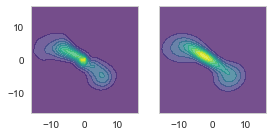

In [62]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [63]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


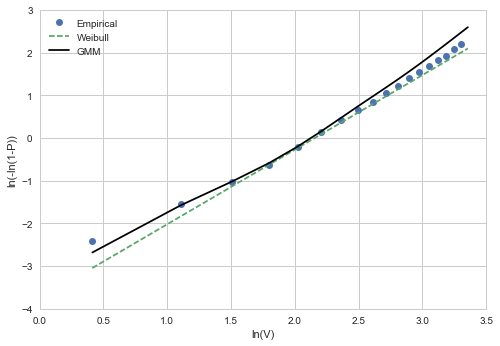

In [64]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


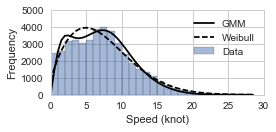

In [65]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


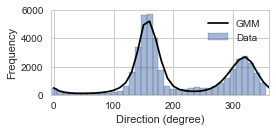

In [66]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [67]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.908109690814


## 6.3 Sectoral Comaprison

In [ ]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
#         fig = plt.figure(figsize=(10,1.7))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
# #         plt_configure(xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

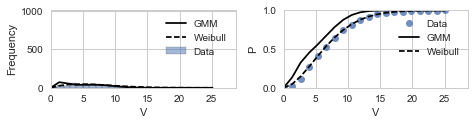

5.0 (-5.0 - 15.0) degree
data size: 468 weight 0.010806068022812811
GMM Weibull
R square 

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [ ]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [ ]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [ ]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [ ]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [ ]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

### 6.4.3 Adjacent Sector Variability

In [ ]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [ ]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

## 7.1 Variability of the Result

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
# df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn%400 == 0)')

In [ ]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)